<a href="https://colab.research.google.com/github/DeaWahsa/skripsikuu/blob/main/Semhas_bismillah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LOAD DAN PREPROCESSING DATA**

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [173]:
# Mengganti path dengan direktori yang sesuai
path = '/content/drive/My Drive/Colab Notebooks/'

data_mitra = pd.read_csv(path + 'mitra_telkom.csv', encoding="ISO-8859-1")

In [174]:
data_mitra

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team lengkap,team tidak lengkap,rapih,tidak rapih,Label
0,8,3582546,28660368,59,74,1,0,0,1,0,1,0,1,0,1,0,3
1,8,16057014,128456112,59,74,1,0,0,1,0,1,0,1,0,1,0,3
2,8,1955579,15644632,59,74,1,0,0,1,0,1,0,1,0,1,0,3
3,8,24203409,193627272,59,74,1,0,0,1,0,1,0,1,0,1,0,3
4,8,7735037,61880296,59,74,1,0,0,1,0,1,0,1,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6917,16,2165478,34647648,29,2,1,0,0,1,0,1,0,1,0,1,0,1
6918,16,2165478,34647648,29,2,1,0,0,1,0,1,0,1,0,1,0,1
6919,16,2165478,34647648,29,2,0,1,0,1,0,1,0,1,0,0,1,1
6920,16,2103255,33652080,29,2,0,1,0,1,0,1,0,1,0,0,1,1


In [175]:
data_mitra.isnull().sum()

Jumlah Projek                           0
Local Amount                            0
nilai projek per LoP                    0
Duration (Days)                         0
Masalaku                                0
kontrak harga satuan kurang memenuhi    0
kontrak harga satuan memenuhi           0
kontrak harga satuan tidak memenuhi     0
alker lengkap                           0
alker tidak lengkap                     0
stok material tersedia                  0
stok material tidak tersedia            0
team lengkap                            0
team tidak lengkap                      0
rapih                                   0
tidak rapih                             0
Label                                   0
dtype: int64

In [176]:
# Cek jumlah baris pada data
jumlah_baris = data_mitra.shape[0]

print("Jumlah baris pada data:", jumlah_baris)

Jumlah baris pada data: 6922


In [177]:
print(data_mitra['Label'].value_counts())
#print(df_dataTraining.value_counts())

0    4297
2    1410
3     945
1     270
Name: Label, dtype: int64


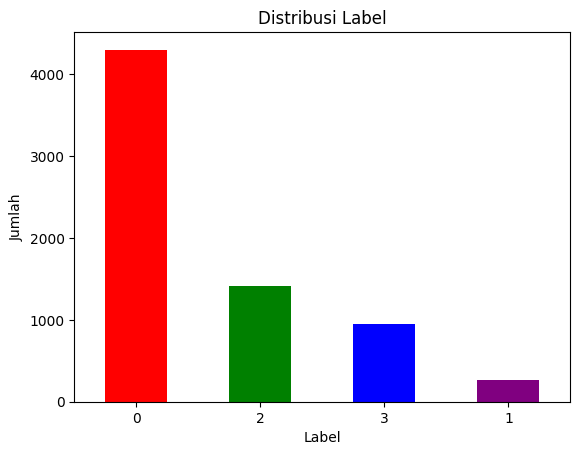

In [178]:
import matplotlib.pyplot as plt

counts = data_mitra['Label'].value_counts()

# Daftar warna untuk setiap label
colors = ['red', 'green', 'blue', 'purple']

# Plot
counts.plot(kind='bar', color=colors)
plt.title('Distribusi Label')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

In [179]:
X = data_mitra.drop("Label",axis=1).to_numpy()
X

array([[        8,   3582546,  28660368, ...,         0,         1,
                0],
       [        8,  16057014, 128456112, ...,         0,         1,
                0],
       [        8,   1955579,  15644632, ...,         0,         1,
                0],
       ...,
       [       16,   2165478,  34647648, ...,         0,         0,
                1],
       [       16,   2103255,  33652080, ...,         0,         0,
                1],
       [       16,   2165478,  34647648, ...,         0,         0,
                1]])

In [180]:
y = data_mitra['Label'].to_numpy()
X = data_mitra.drop("Label",axis=1).to_numpy()

In [181]:
data_mitra['Label'] = pd.to_numeric(data_mitra['Label'])

In [182]:
y = data_mitra["Label"].to_numpy()
y[0:5]

array([3, 3, 3, 3, 3])

In [183]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, stratify=y, random_state=42)

In [184]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5537, 16)
(5537,)
(1385, 16)
(1385,)


# XGBOOST

In [185]:
import xgboost as xgb

In [186]:
# Buat objek XGBoost
xgb_clf = xgb.XGBClassifier()

In [187]:
# Train XGBoost classifier
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
param = {
    'max_depth': 6,
    'eta': 0.3,
    'objective': 'multi:softmax',
    'num_class': len(set(y_train)) + 1
}
num_round = 100
bst = xgb.train(param, dtrain, num_round)

# Predict for test data
y_pred = bst.predict(dtest)

In [188]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate accuracy of classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8808664259927798
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       860
           1       0.83      0.70      0.76        54
           2       0.86      0.79      0.82       282
           3       0.83      0.75      0.79       189

    accuracy                           0.88      1385
   macro avg       0.85      0.80      0.82      1385
weighted avg       0.88      0.88      0.88      1385

Confusion Matrix:
[[818   3  20  19]
 [  6  38   8   2]
 [ 46   5 223   8]
 [ 39   0   9 141]]


In [189]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='weighted')

print('XGBoost Accuracy:', accuracy)
print('XGBoost Precision:', precision)
print('XGBoost Recall:', recall)
print('XGBoost F1-score:', f1)

XGBoost Accuracy: 0.8808664259927798
XGBoost Precision: 0.8788029895233721
XGBoost Recall: 0.7979195955692739
XGBoost F1-score: 0.8786253120508035


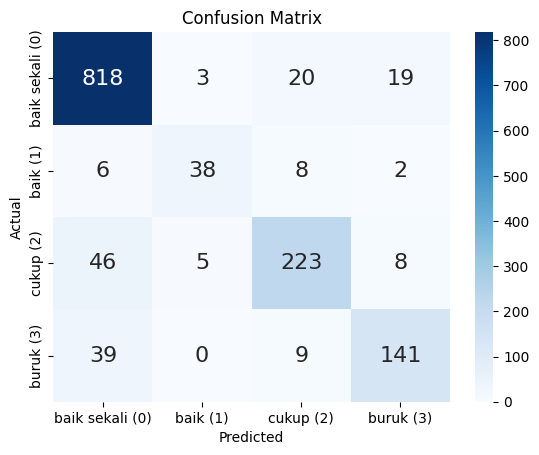

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cetak confusion matrix dalam bentuk gambar
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
            annot_kws={"size": 16, "ha": 'center', "va": 'center'})
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Atur label sumbu x dan y
plt.xticks([0.5, 1.5, 2.5, 3.5], ['baik sekali (0)', 'baik (1)', 'cukup (2)', 'buruk (3)'])
plt.yticks([0.5, 1.5, 2.5, 3.5], ['baik sekali (0)', 'baik (1)', 'cukup (2)', 'buruk (3)'])

plt.title('Confusion Matrix')
plt.show()

# HASIL DATA DARI CONFUSION MATRIKS XGBOOST

In [19]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [20]:
column_names = ['Jumlah Projek', 'Local Amount', 'nilai projek per LoP', 'Duration (Days)','Masalaku','kontrak harga satuan kurang memenuhi','kontrak harga satuan memenuhi','kontrak harga satuan tidak memenuhi','alker lengkap','alker tidak lengkap','stok material tersedia','stok material tidak tersedia','team tidak lengkap','rapih','tidak rapih','Label']

# Konversi X_test ke DataFrame dan tetapkan nama kolom
X_test_df = pd.DataFrame(X_test, columns=column_names)

# Pastikan y_test dan y_pred adalah pandas Series
y_test_series = pd.Series(y_test, name='data test')
y_pred_series = pd.Series(y_pred, name='data prediksi')

df_new = pd.DataFrame({'data test': y_test_series, 'data prediksi': y_pred_series})

# Gabungkan DataFrames
df_combined = pd.concat([X_test_df.reset_index(drop=True), df_new.reset_index(drop=True)], axis=1)

df_combined = df_combined.drop(columns=['Label'])

# Menampilkan beberapa baris pertama dari DataFrame yang dikombinasikan
df_combined

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team tidak lengkap,rapih,tidak rapih,data test,data prediksi
0,1,1980882,1980882,60,37,1,0,0,1,0,1,0,1,0,1,0,0.0
1,1,15005931,15005931,44,11,1,0,0,1,0,1,0,1,0,1,0,0.0
2,1,15415230,15415230,44,43,1,0,0,1,0,1,0,1,0,1,0,0.0
3,48,4708904,226027392,119,10,1,0,0,1,0,1,0,1,0,1,1,1.0
4,1,219382679,219382679,89,56,1,0,0,1,0,1,0,1,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,14,4457422,62403908,44,5,1,0,0,1,0,1,0,1,0,1,0,0.0
1381,25,96011815,2400295375,99,86,1,0,0,1,0,1,0,1,0,1,2,2.0
1382,7,147283695,1030985865,74,69,1,0,0,1,0,1,0,1,0,1,0,0.0
1383,124,6178840,766176160,44,7,1,0,0,1,0,1,0,1,0,1,0,0.0


In [21]:
df_combined.to_excel("output perbandingan xgboost.xlsx")

In [22]:
# Memilih baris di mana 'data test' adalah 0 dan 'data prediksi' adalah 1
filtered_data_xgboost = df_combined[(df_combined['data test'] == 0) & (df_combined['data prediksi'] == 1)]

filtered_data_xgboost

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team tidak lengkap,rapih,tidak rapih,data test,data prediksi
17,1,98118089,98118089,119,92,1,0,0,0,1,1,0,0,1,0,0,1.0
151,3,286620450,859861350,74,62,1,0,0,1,0,1,0,1,0,1,0,1.0
284,1,51383765,51383765,89,56,1,0,0,0,1,1,0,1,0,1,0,1.0


In [23]:
# Memilih baris di mana 'data test' adalah 0 dan 'data prediksi' adalah 2
filtered_data_xgboost = df_combined[(df_combined['data test'] == 0) & (df_combined['data prediksi'] == 2)]

filtered_data_xgboost[:10]

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team tidak lengkap,rapih,tidak rapih,data test,data prediksi
45,110,147299790,16202976900,44,41,1,0,0,1,0,1,0,1,0,1,0,2.0
74,20,444605485,8892109700,59,57,1,0,0,1,0,1,0,1,0,1,0,2.0
108,1,268384145,268384145,79,62,1,0,0,1,0,1,0,1,0,1,0,2.0
342,1,387887662,387887662,101,123,1,0,0,1,0,1,0,1,0,1,0,2.0
401,12,215492844,2585914128,82,24,1,0,0,1,0,1,0,1,0,1,0,2.0
416,13,1453505370,18895569810,75,53,1,0,0,1,0,1,0,1,0,1,0,2.0
421,8,29351443,234811544,59,16,1,0,0,1,0,1,0,1,0,1,0,2.0
452,110,121756700,13393237000,44,41,1,0,0,1,0,1,0,1,0,1,0,2.0
590,110,9288650,1021751500,44,52,1,0,0,1,0,1,0,1,0,1,0,2.0
638,87,35892390,3122637930,45,47,1,0,0,1,0,1,0,1,0,1,0,2.0


In [24]:
# Memilih baris di mana 'data test' adalah 0 dan 'data prediksi' adalah 3
filtered_data_xgboost = df_combined[(df_combined['data test'] == 0) & (df_combined['data prediksi'] == 3)]

filtered_data_xgboost[:10]

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team tidak lengkap,rapih,tidak rapih,data test,data prediksi
27,8,161197234,1289577872,74,58,1,0,0,1,0,0,1,1,0,1,0,3.0
94,4,104162029,416648116,44,49,1,0,0,1,0,1,0,1,0,1,0,3.0
133,23,13012210,299280830,59,71,1,0,0,1,0,1,0,1,0,1,0,3.0
258,5,156251132,781255660,94,208,1,0,0,1,0,1,0,1,0,1,0,3.0
296,7,97087161,679610127,59,72,1,0,0,1,0,1,0,1,0,1,0,3.0
424,1,16750741,16750741,29,30,1,0,0,1,0,1,0,1,0,1,0,3.0
503,11,303734458,3341079038,59,57,1,0,0,1,0,1,0,1,0,1,0,3.0
663,8,46679345,373434760,44,48,1,0,0,1,0,1,0,1,0,1,0,3.0
664,1,17044008,17044008,44,15,1,0,0,1,0,1,0,1,0,1,0,3.0
689,1,3290177,3290177,104,95,1,0,0,1,0,1,0,1,0,1,0,3.0


In [25]:
# Memilih baris di mana 'data test' adalah 1 dan 'data prediksi' adalah 0
filtered_data_xgboost = df_combined[(df_combined['data test'] == 1) & (df_combined['data prediksi'] == 0)]

filtered_data_xgboost

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team tidak lengkap,rapih,tidak rapih,data test,data prediksi
48,6,405786854,2434721124,139,136,1,0,0,1,0,1,0,1,0,1,1,0.0
352,1,56684859,56684859,29,23,1,0,0,1,0,1,0,1,0,1,1,0.0
516,1,26285610,26285610,44,23,1,0,0,1,0,1,0,1,0,1,1,0.0
912,4,360507811,1442031244,54,44,1,0,0,1,0,1,0,1,0,1,1,0.0
1058,13,106638041,1386294533,61,44,1,0,0,1,0,1,0,1,0,1,1,0.0
1165,4,228480972,913923888,59,54,1,0,0,1,0,1,0,1,0,1,1,0.0


In [26]:
# Memilih baris di mana 'data test' adalah 1 dan 'data prediksi' adalah 2
filtered_data_xgboost = df_combined[(df_combined['data test'] == 1) & (df_combined['data prediksi'] == 2)]

filtered_data_xgboost

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team tidak lengkap,rapih,tidak rapih,data test,data prediksi
112,25,136416504,3410412600,99,86,1,0,0,1,0,1,0,1,0,1,1,2.0
310,6,274452446,1646714676,178,124,1,0,0,1,0,1,0,1,0,1,1,2.0
458,126,181300070,22843808820,44,41,0,1,0,0,1,1,0,1,0,1,1,2.0
475,6,73867782,443206692,178,124,1,0,0,1,0,1,0,1,0,1,1,2.0
770,77,36629193,2820447861,59,59,1,0,0,0,1,1,0,1,0,1,1,2.0
1085,126,35054090,4416815340,44,41,0,1,0,0,1,1,0,1,0,1,1,2.0
1086,6,190305360,1141832160,178,124,1,0,0,1,0,1,0,1,0,1,1,2.0
1365,3,6247889,18743667,59,5,1,0,0,1,0,1,0,1,0,1,1,2.0


In [27]:
# Memilih baris di mana 'data test' adalah 1 dan 'data prediksi' adalah 3
filtered_data_xgboost = df_combined[(df_combined['data test'] == 1) & (df_combined['data prediksi'] == 3)]

filtered_data_xgboost

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team tidak lengkap,rapih,tidak rapih,data test,data prediksi
297,7,34766485,243365395,59,60,1,0,0,1,0,0,1,1,0,1,1,3.0
483,15,8550117,128251755,44,65,1,0,0,0,1,1,0,1,0,1,1,3.0


In [28]:
# Memilih baris di mana 'data test' adalah 2 dan 'data prediksi' adalah 0
filtered_data_xgboost = df_combined[(df_combined['data test'] == 2) & (df_combined['data prediksi'] == 0)]

filtered_data_xgboost[:10]

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team tidak lengkap,rapih,tidak rapih,data test,data prediksi
15,32,62610527,2003536864,140,49,1,0,0,1,0,1,0,1,0,1,2,0.0
21,106,41110150,4357675900,44,28,1,0,0,1,0,1,0,1,0,1,2,0.0
66,126,30615930,3857607180,44,41,1,0,0,1,0,1,0,1,0,1,2,0.0
117,8,292588832,2340710656,74,58,1,0,0,1,0,1,0,1,0,1,2,0.0
144,8,416235453,3329883624,74,58,1,0,0,1,0,1,0,1,0,1,2,0.0
184,106,63572910,6738728460,44,28,1,0,0,1,0,1,0,1,0,1,2,0.0
295,126,13740810,1731342060,44,41,1,0,0,1,0,1,0,1,0,1,2,0.0
337,11,161717036,1778887396,118,92,1,0,0,1,0,1,0,1,0,1,2,0.0
345,14,10538118,147533652,89,85,1,0,0,1,0,1,0,1,0,1,2,0.0
362,87,50182250,4365855750,45,47,1,0,0,1,0,1,0,1,0,1,2,0.0


In [29]:
# Memilih baris di mana 'data test' adalah 2 dan 'data prediksi' adalah 1
filtered_data_xgboost = df_combined[(df_combined['data test'] == 2) & (df_combined['data prediksi'] == 1)]

filtered_data_xgboost

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team tidak lengkap,rapih,tidak rapih,data test,data prediksi
767,126,29391040,3703271040,44,41,0,1,0,0,1,1,0,1,0,1,2,1.0
908,5,123789915,618949575,133,133,1,0,0,1,0,1,0,0,1,1,2,1.0
942,126,28892960,3640512960,44,41,0,1,0,0,1,1,0,1,0,1,2,1.0
1023,2,26601052,53202104,29,4,1,0,0,1,0,1,0,1,0,1,2,1.0
1374,2,252149540,504299080,44,43,0,1,0,0,1,1,0,1,0,1,2,1.0


In [30]:
# Memilih baris di mana 'data test' adalah 2 dan 'data prediksi' adalah 3
filtered_data_xgboost = df_combined[(df_combined['data test'] == 2) & (df_combined['data prediksi'] == 3)]

filtered_data_xgboost

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team tidak lengkap,rapih,tidak rapih,data test,data prediksi
57,8,32885895,263087160,44,41,1,0,0,0,1,0,1,1,0,1,2,3.0
185,1,333369792,333369792,59,214,1,0,0,1,0,1,0,0,1,0,2,3.0
690,1,437863179,437863179,49,60,1,0,0,1,0,1,0,1,0,1,2,3.0
893,106,92046914,9756972884,101,123,1,0,0,1,0,1,0,1,0,1,2,3.0
989,87,15738080,1369212960,45,63,1,0,0,1,0,1,0,1,0,1,2,3.0
1232,106,147919570,15679474420,44,28,1,0,0,1,0,1,0,1,0,1,2,3.0
1368,1,69117510,69117510,29,32,1,0,0,1,0,1,0,1,0,1,2,3.0
1369,1,337697540,337697540,59,56,1,0,0,0,1,0,1,1,0,1,2,3.0


In [31]:
# Memilih baris di mana 'data test' adalah 3 dan 'data prediksi' adalah 0
filtered_data_xgboost = df_combined[(df_combined['data test'] == 3) & (df_combined['data prediksi'] == 0)]

filtered_data_xgboost[:10]

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team tidak lengkap,rapih,tidak rapih,data test,data prediksi
12,1,107969614,107969614,29,29,1,0,0,1,0,1,0,1,0,0,3,0.0
78,1,17547376,17547376,44,35,1,0,0,1,0,1,0,1,0,1,3,0.0
107,1,329259757,329259757,89,233,1,0,0,1,0,1,0,1,0,1,3,0.0
110,1,471275608,471275608,44,51,1,0,0,1,0,1,0,1,0,1,3,0.0
124,106,50503860,5353409160,44,28,1,0,0,1,0,1,0,1,0,1,3,0.0
276,1,53540947,53540947,44,15,1,0,0,1,0,1,0,1,0,1,3,0.0
286,106,10433430,1105943580,44,28,1,0,0,1,0,1,0,1,0,1,3,0.0
364,1,50715663,50715663,44,15,1,0,0,1,0,1,0,1,0,1,3,0.0
430,1,139105687,139105687,44,15,1,0,0,1,0,1,0,1,0,1,3,0.0
453,1,5375978,5375978,44,15,1,0,0,1,0,1,0,1,0,1,3,0.0


In [32]:
# Memilih baris di mana 'data test' adalah 3 dan 'data prediksi' adalah 2
filtered_data_xgboost = df_combined[(df_combined['data test'] == 3) & (df_combined['data prediksi'] == 2)]

filtered_data_xgboost

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team tidak lengkap,rapih,tidak rapih,data test,data prediksi
231,4,63007321,252029284,44,45,1,0,0,1,0,1,0,0,1,0,3,2.0
602,11,15381520,169196720,44,42,1,0,0,1,0,1,0,0,1,0,3,2.0
930,2,57215560,114431120,33,50,1,0,0,1,0,1,0,0,1,0,3,2.0
970,7,10134533,70941731,133,90,1,0,0,1,0,1,0,1,0,1,3,2.0
972,9,1250521720,11254695480,124,294,1,0,0,1,0,1,0,1,0,1,3,2.0
981,1,35017847,35017847,29,20,1,0,0,1,0,1,0,0,1,0,3,2.0
1051,2,347260432,694520864,56,51,1,0,0,1,0,1,0,1,0,1,3,2.0
1143,126,21152700,2665240200,44,41,1,0,0,1,0,1,0,1,0,1,3,2.0
1225,9,1000576230,9005186070,124,311,1,0,0,1,0,1,0,1,0,1,3,2.0


# ADABOOST

In [146]:
from sklearn.ensemble import AdaBoostClassifier

In [147]:
# Buat objek AdaboostClassifier
adaboost_clf = AdaBoostClassifier()

# Latih model pada data pelatihan
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier()

In [148]:
# Buat prediksi pada data pengujian
y_pred = adaboost_clf.predict(X_test)

In [149]:
# Hitung akurasi dari prediksi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

Akurasi: 0.7971119133574007


In [150]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate accuracy of classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7971119133574007
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       860
           1       0.21      0.15      0.17        54
           2       0.72      0.79      0.76       282
           3       0.73      0.50      0.59       189

    accuracy                           0.80      1385
   macro avg       0.63      0.59      0.60      1385
weighted avg       0.79      0.80      0.79      1385

Confusion Matrix:
[[778  17  44  21]
 [ 21   8  19   6]
 [ 44   7 224   7]
 [ 66   6  23  94]]


In [151]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

class AdaBoost:
    def __init__(self, n_estimators=100, learning_rate=1.0):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.estimators = []
        self.estimator_weights = []

    def fit(self, X, y):
        # Inisialisasi bobot sampel
        sample_weights = np.full(len(X), 1 / len(X))

        for _ in range(self.n_estimators):
            # Membuat pengklasifikasi lemah baru (DecisionTreeClassifier dalam hal ini)
            estimator = DecisionTreeClassifier(max_depth=2)  # Mengubah max_depth menjadi 2
            estimator.fit(X, y, sample_weight=sample_weights)

            # Prediksi dengan pengklasifikasi saat ini
            y_pred = estimator.predict(X)

            # Menghitung kesalahan tertimbang
            weighted_error = np.sum(sample_weights * (y_pred != y)) / np.sum(sample_weights)

            # Menghitung bobot pengklasifikasi
            estimator_weight = self.learning_rate * np.log((1 - weighted_error) / weighted_error)

            # Memperbarui bobot sampel
            sample_weights *= np.exp(estimator_weight * (y_pred != y))

            # Menormalisasi bobot sampel
            sample_weights /= np.sum(sample_weights)

            # Menambahkan pengklasifikasi dan bobotnya ke daftar
            self.estimators.append(estimator)
            self.estimator_weights.append(estimator_weight)

    def predict_proba(self, X):
        # Inisialisasi prediksi
        pred = np.zeros((X.shape[0], np.max(y) + 1))

        for i in range(len(self.estimators)):
            estimator = self.estimators[i]
            estimator_weight = self.estimator_weights[i]

            # Memperbarui prediksi dengan pengklasifikasi saat ini
            pred += estimator_weight * estimator.predict_proba(X)

        return pred / np.sum(self.estimator_weights)

    def predict(self, X):
        # Memprediksi kelas dengan probabilitas tertinggi
        return np.argmax(self.predict_proba(X), axis=1)

from sklearn.metrics import accuracy_score

# Menginisialisasi model AdaBoost dengan parameter yang berbeda
adaboost = AdaBoost(n_estimators=50, learning_rate=0.5)  # Mengubah jumlah pengklasifikasi dan tingkat pembelajaran

# Melatih model pada set pelatihan
adaboost.fit(X_train, y_train)

# Memprediksi kelas pada set pengujian
y_pred = adaboost.predict(X_test)

# Menghitung akurasi model
akurasi = accuracy_score(y_test, y_pred)
print("Akurasi:", akurasi)

# Menghitung confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(conf_mat)

# Menampilkan classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Akurasi: 0.7935018050541516
Confusion Matrix:
[[780   0  35  45]
 [ 43   0   5   6]
 [ 53   0 217  12]
 [ 65   0  22 102]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       860
           1       0.00      0.00      0.00        54
           2       0.78      0.77      0.77       282
           3       0.62      0.54      0.58       189

    accuracy                           0.79      1385
   macro avg       0.56      0.55      0.55      1385
weighted avg       0.76      0.79      0.77      1385



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [152]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='weighted')

print('AdaBoost Accuracy:', accuracy)
print('AdaBoost Precision:', precision)
print('AdaBoost Recall:', recall)
print('AdaBoost F1-score:', f1)

AdaBoost Accuracy: 0.7935018050541516
AdaBoost Precision: 0.7574211970892666
AdaBoost Recall: 0.5540407074919692
AdaBoost F1-score: 0.7740037337310156


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


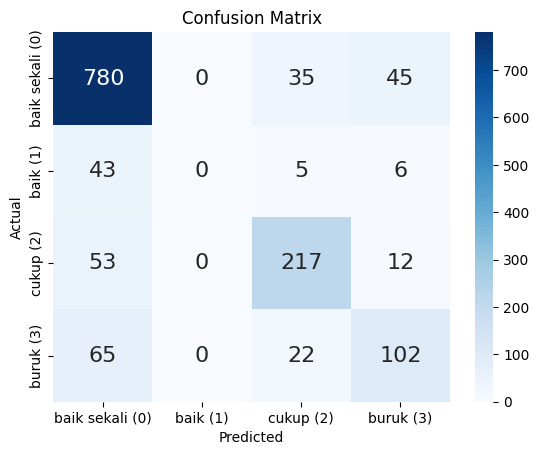

In [39]:
# Cetak confusion matrix dalam bentuk gambar
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
            annot_kws={"size": 16, "ha": 'center', "va": 'center'})
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Atur label sumbu x dan y
plt.xticks([0.5, 1.5, 2.5, 3.5], ['baik sekali (0)', 'baik (1)', 'cukup (2)', 'buruk (3)'])
plt.yticks([0.5, 1.5, 2.5, 3.5], ['baik sekali (0)', 'baik (1)', 'cukup (2)', 'buruk (3)'])

plt.title('Confusion Matrix')
plt.show()

#HASIL DATA DARI CONFUSION MATRIKS ADABOOST

In [40]:
column_names = ['Jumlah Projek', 'Local Amount', 'nilai projek per LoP', 'Duration (Days)','Masalaku','kontrak harga satuan kurang memenuhi','kontrak harga satuan memenuhi','kontrak harga satuan tidak memenuhi','alker lengkap','alker tidak lengkap','stok material tersedia','stok material tidak tersedia','team tidak lengkap','rapih','tidak rapih','Label']

# Konversi X_test ke DataFrame dan tetapkan nama kolom
X_test_df = pd.DataFrame(X_test, columns=column_names)

# Pastikan y_test dan y_pred adalah pandas Series
y_test_series = pd.Series(y_test, name='data test')
y_pred_series = pd.Series(y_pred, name='data prediksi')

df_new = pd.DataFrame({'data test': y_test_series, 'data prediksi': y_pred_series})

# Gabungkan DataFrames
df_combined = pd.concat([X_test_df.reset_index(drop=True), df_new.reset_index(drop=True)], axis=1)

df_combined = df_combined.drop(columns=['Label'])

# Menampilkan beberapa baris pertama dari DataFrame yang dikombinasikan
df_combined

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team tidak lengkap,rapih,tidak rapih,data test,data prediksi
0,1,1980882,1980882,60,37,1,0,0,1,0,1,0,1,0,1,0,0
1,1,15005931,15005931,44,11,1,0,0,1,0,1,0,1,0,1,0,0
2,1,15415230,15415230,44,43,1,0,0,1,0,1,0,1,0,1,0,0
3,48,4708904,226027392,119,10,1,0,0,1,0,1,0,1,0,1,1,0
4,1,219382679,219382679,89,56,1,0,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,14,4457422,62403908,44,5,1,0,0,1,0,1,0,1,0,1,0,0
1381,25,96011815,2400295375,99,86,1,0,0,1,0,1,0,1,0,1,2,2
1382,7,147283695,1030985865,74,69,1,0,0,1,0,1,0,1,0,1,0,0
1383,124,6178840,766176160,44,7,1,0,0,1,0,1,0,1,0,1,0,0


In [41]:
df_combined.to_excel("output perbandingan adaboost.xlsx")

In [42]:
# Memilih baris di mana 'data test' adalah 0 dan 'data prediksi' adalah 2
filtered_data_adaboost = df_combined[(df_combined['data test'] == 0) & (df_combined['data prediksi'] == 2)]

filtered_data_adaboost[:10]

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team tidak lengkap,rapih,tidak rapih,data test,data prediksi
13,87,174922370,15218246190,29,28,1,0,0,1,0,1,0,1,0,1,0,2
45,110,147299790,16202976900,44,41,1,0,0,1,0,1,0,1,0,1,0,2
52,7,549935309,3849547163,89,96,1,0,0,1,0,1,0,1,0,1,0,2
99,106,50653160,5369234960,44,28,1,0,0,1,0,1,0,1,0,1,0,2
141,106,37484150,3973319900,44,28,1,0,0,1,0,1,0,1,0,1,0,2
159,12,650161873,7801942476,89,64,1,0,0,1,0,1,0,1,0,1,0,2
208,40,59523575,2380943000,89,83,1,0,0,1,0,1,0,1,0,1,0,2
247,32,214569918,6866237376,140,49,1,0,0,1,0,1,0,1,0,1,0,2
277,110,49459180,5440509800,44,41,1,0,0,1,0,1,0,1,0,1,0,2
301,126,56148370,7074694620,44,41,1,0,0,1,0,1,0,1,0,1,0,2


In [43]:
# Memilih baris di mana 'data test' adalah 0 dan 'data prediksi' adalah 3
filtered_data_adaboost = df_combined[(df_combined['data test'] == 0) & (df_combined['data prediksi'] == 3)]

filtered_data_adaboost[:10]

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team tidak lengkap,rapih,tidak rapih,data test,data prediksi
42,22,13943188,306750136,59,59,1,0,0,1,0,1,0,1,0,1,0,3
47,20,27852200,557044000,59,57,1,0,0,1,0,1,0,1,0,1,0,3
74,20,444605485,8892109700,59,57,1,0,0,1,0,1,0,1,0,1,0,3
94,4,104162029,416648116,44,49,1,0,0,1,0,1,0,1,0,1,0,3
133,23,13012210,299280830,59,71,1,0,0,1,0,1,0,1,0,1,0,3
137,5,331321393,1656606965,61,61,1,0,0,1,0,1,0,1,0,1,0,3
194,77,6427744,494936288,59,59,1,0,0,1,0,1,0,1,0,1,0,3
281,77,3692761,284342597,59,59,1,0,0,1,0,1,0,1,0,1,0,3
285,22,4412359,97071898,59,59,1,0,0,1,0,1,0,1,0,1,0,3
296,7,97087161,679610127,59,72,1,0,0,1,0,1,0,1,0,1,0,3


In [44]:
# Memilih baris di mana 'data test' adalah 1 dan 'data prediksi' adalah 0
filtered_data_adaboost = df_combined[(df_combined['data test'] == 1) & (df_combined['data prediksi'] == 0)]

filtered_data_adaboost[:10]

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team tidak lengkap,rapih,tidak rapih,data test,data prediksi
3,48,4708904,226027392,119,10,1,0,0,1,0,1,0,1,0,1,1,0
61,16,2103255,33652080,29,2,0,1,0,1,0,1,0,1,0,0,1,0
157,27,4287872,115772544,74,12,1,0,0,1,0,1,0,1,0,1,1,0
235,5,37917045,189585225,44,44,0,1,0,1,0,1,0,1,0,0,1,0
255,16,2165478,34647648,29,2,1,0,0,1,0,1,0,1,0,1,1,0
261,6,9087970,54527820,59,5,1,0,0,1,0,1,0,1,0,1,1,0
273,12,12765468,153185616,44,12,1,0,0,1,0,1,0,1,0,1,1,0
310,6,274452446,1646714676,178,124,1,0,0,1,0,1,0,1,0,1,1,0
352,1,56684859,56684859,29,23,1,0,0,1,0,1,0,1,0,1,1,0
357,27,27833909,751515543,74,12,1,0,0,1,0,1,0,1,0,1,1,0


In [45]:
# Memilih baris di mana 'data test' adalah 1 dan 'data prediksi' adalah 2
filtered_data_adaboost = df_combined[(df_combined['data test'] == 1) & (df_combined['data prediksi'] == 2)]

filtered_data_adaboost

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team tidak lengkap,rapih,tidak rapih,data test,data prediksi
48,6,405786854,2434721124,139,136,1,0,0,1,0,1,0,1,0,1,1,2
112,25,136416504,3410412600,99,86,1,0,0,1,0,1,0,1,0,1,1,2
458,126,181300070,22843808820,44,41,0,1,0,0,1,1,0,1,0,1,1,2
591,106,55362030,5868375180,44,28,1,0,0,1,0,0,1,1,0,1,1,2
1085,126,35054090,4416815340,44,41,0,1,0,0,1,1,0,1,0,1,1,2


In [46]:
# Memilih baris di mana 'data test' adalah 1 dan 'data prediksi' adalah 3
filtered_data_adaboost = df_combined[(df_combined['data test'] == 1) & (df_combined['data prediksi'] == 3)]

filtered_data_adaboost

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team tidak lengkap,rapih,tidak rapih,data test,data prediksi
297,7,34766485,243365395,59,60,1,0,0,1,0,0,1,1,0,1,1,3
483,15,8550117,128251755,44,65,1,0,0,0,1,1,0,1,0,1,1,3
770,77,36629193,2820447861,59,59,1,0,0,0,1,1,0,1,0,1,1,3
953,24,2017802,48427248,44,48,0,1,0,1,0,1,0,1,0,0,1,3
1165,4,228480972,913923888,59,54,1,0,0,1,0,1,0,1,0,1,1,3
1309,5,389980101,1949900505,59,59,1,0,0,1,0,0,1,1,0,1,1,3


In [47]:
# Memilih baris di mana 'data test' adalah 2 dan 'data prediksi' adalah 0
filtered_data_adaboost = df_combined[(df_combined['data test'] == 2) & (df_combined['data prediksi'] == 0)]

filtered_data_adaboost[:10]

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team tidak lengkap,rapih,tidak rapih,data test,data prediksi
15,32,62610527,2003536864,140,49,1,0,0,1,0,1,0,1,0,1,2,0
31,5,20676666,103383330,29,5,1,0,0,1,0,1,0,1,0,1,2,0
57,8,32885895,263087160,44,41,1,0,0,0,1,0,1,1,0,1,2,0
71,3,6370954,19112862,29,14,0,1,0,1,0,0,1,0,1,0,2,0
87,5,25129069,125645345,29,5,1,0,0,1,0,1,0,1,0,1,2,0
201,4,80526834,322107336,29,5,1,0,0,1,0,1,0,1,0,1,2,0
295,126,13740810,1731342060,44,41,1,0,0,1,0,1,0,1,0,1,2,0
319,4,44558558,178234232,29,5,1,0,0,1,0,1,0,1,0,1,2,0
337,11,161717036,1778887396,118,92,1,0,0,1,0,1,0,1,0,1,2,0
345,14,10538118,147533652,89,85,1,0,0,1,0,1,0,1,0,1,2,0


In [48]:
# Memilih baris di mana 'data test' adalah 2 dan 'data prediksi' adalah 3
filtered_data_adaboost = df_combined[(df_combined['data test'] == 2) & (df_combined['data prediksi'] == 3)]

filtered_data_adaboost

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team tidak lengkap,rapih,tidak rapih,data test,data prediksi
117,8,292588832,2340710656,74,58,1,0,0,1,0,1,0,1,0,1,2,3
144,8,416235453,3329883624,74,58,1,0,0,1,0,1,0,1,0,1,2,3
185,1,333369792,333369792,59,214,1,0,0,1,0,1,0,0,1,0,2,3
584,110,25897510,2848726100,44,52,1,0,0,1,0,1,0,1,0,1,2,3
657,77,7165777,551764829,59,59,1,0,0,1,0,1,0,1,0,1,2,3
690,1,437863179,437863179,49,60,1,0,0,1,0,1,0,1,0,1,2,3
762,8,545231322,4361850576,74,58,1,0,0,1,0,1,0,1,0,1,2,3
764,77,4449064,342577928,59,59,1,0,0,1,0,1,0,1,0,1,2,3
989,87,15738080,1369212960,45,63,1,0,0,1,0,1,0,1,0,1,2,3
1126,77,37145154,2860176858,59,59,1,0,0,1,0,1,0,1,0,1,2,3


In [49]:
# Memilih baris di mana 'data test' adalah 3 dan 'data prediksi' adalah 0
filtered_data_adaboost = df_combined[(df_combined['data test'] == 3) & (df_combined['data prediksi'] == 0)]

filtered_data_adaboost[:10]

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team tidak lengkap,rapih,tidak rapih,data test,data prediksi
5,11,14294525,157239775,126,135,1,0,0,1,0,1,0,0,1,0,3,0
9,8,170307171,1362457368,119,124,1,0,0,1,0,1,0,1,0,1,3,0
12,1,107969614,107969614,29,29,1,0,0,1,0,1,0,1,0,0,3,0
40,13,117531981,1527915753,75,21,1,0,0,1,0,1,0,1,0,1,3,0
78,1,17547376,17547376,44,35,1,0,0,1,0,1,0,1,0,1,3,0
106,11,5866737,64534107,29,42,1,0,0,1,0,1,0,1,0,1,3,0
107,1,329259757,329259757,89,233,1,0,0,1,0,1,0,1,0,1,3,0
122,37,43513161,1609986957,89,99,1,0,0,1,0,1,0,1,0,1,3,0
155,5,214600244,1073001220,94,208,1,0,0,1,0,0,1,0,1,1,3,0
172,1,7719427,7719427,44,15,1,0,0,0,1,1,0,1,0,1,3,0


In [50]:
# Memilih baris di mana 'data test' adalah 3 dan 'data prediksi' adalah 2
filtered_data_adaboost = df_combined[(df_combined['data test'] == 3) & (df_combined['data prediksi'] == 2)]

filtered_data_adaboost[:10]

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team tidak lengkap,rapih,tidak rapih,data test,data prediksi
89,3,855688647,2567065941,89,123,1,0,0,1,0,1,0,1,0,1,3,2
114,37,385042094,14246557478,89,123,1,0,0,1,0,1,0,1,0,1,3,2
124,106,50503860,5353409160,44,28,1,0,0,1,0,1,0,1,0,1,3,2
165,37,669067189,24755485993,89,123,1,0,0,1,0,1,0,1,0,1,3,2
189,37,193000614,7141022718,89,123,1,0,0,1,0,1,0,1,0,1,3,2
305,13,184020861,2392271193,59,29,1,0,0,1,0,1,0,1,0,1,3,2
387,15,214017191,3210257865,89,93,1,0,0,1,0,1,0,1,0,1,3,2
396,37,315856748,11686699676,89,123,1,0,0,1,0,1,0,1,0,1,3,2
562,9,1024450895,9220058055,89,112,1,0,0,1,0,1,0,1,0,1,3,2
819,13,175520984,2281772792,59,29,1,0,0,1,0,1,0,1,0,1,3,2


# GRADIENT BOOSTING

In [153]:
from sklearn.ensemble import GradientBoostingClassifier

In [154]:
# Buat objek Gradient Boosting
gb_clf = GradientBoostingClassifier()

# Latih model pada data pelatihan
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [155]:
# Buat prediksi pada data pengujian
y_pred = gb_clf.predict(X_test)

In [156]:
# Hitung akurasi dari prediksi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

Akurasi: 0.8642599277978339


In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate accuracy of classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8642599277978339
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       860
           1       0.90      0.52      0.66        54
           2       0.84      0.81      0.82       282
           3       0.80      0.67      0.73       189

    accuracy                           0.86      1385
   macro avg       0.86      0.74      0.78      1385
weighted avg       0.86      0.86      0.86      1385



In [158]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Gradient Boosting Accuracy:', accuracy)
print('Gradient Boosting Precision:', precision)
print('Gradient Boosting Recall:', recall)
print('Gradient Boosting F1-score:', f1)

Gradient Boosting Accuracy: 0.8642599277978339
Gradient Boosting Precision: 0.8626328719231044
Gradient Boosting Recall: 0.73637461417026
Gradient Boosting F1-score: 0.8597950162724902


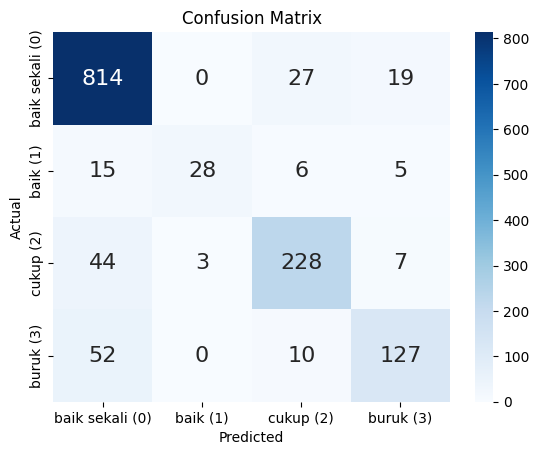

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cetak confusion matrix dalam bentuk gambar
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
            annot_kws={"size": 16, "ha": 'center', "va": 'center'})
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Atur label sumbu x dan y
plt.xticks([0.5, 1.5, 2.5, 3.5], ['baik sekali (0)', 'baik (1)', 'cukup (2)', 'buruk (3)'])
plt.yticks([0.5, 1.5, 2.5, 3.5], ['baik sekali (0)', 'baik (1)', 'cukup (2)', 'buruk (3)'])

plt.title('Confusion Matrix')
plt.show()

# HASIL DATA DARI CONFUSION MATRIX GRADIENT BOOSTING

In [57]:
column_names = ['Jumlah Projek', 'Local Amount', 'nilai projek per LoP', 'Duration (Days)','Masalaku','kontrak harga satuan kurang memenuhi','kontrak harga satuan memenuhi','kontrak harga satuan tidak memenuhi','alker lengkap','alker tidak lengkap','stok material tersedia','stok material tidak tersedia','team tidak lengkap','rapih','tidak rapih','Label']

# Konversi X_test ke DataFrame dan tetapkan nama kolom
X_test_df = pd.DataFrame(X_test, columns=column_names)

# Pastikan y_test dan y_pred adalah pandas Series
y_test_series = pd.Series(y_test, name='data test')
y_pred_series = pd.Series(y_pred, name='data prediksi')

df_new = pd.DataFrame({'data test': y_test_series, 'data prediksi': y_pred_series})

# Gabungkan DataFrames
df_combined = pd.concat([X_test_df.reset_index(drop=True), df_new.reset_index(drop=True)], axis=1)

df_combined = df_combined.drop(columns=['Label'])

# Menampilkan beberapa baris pertama dari DataFrame yang dikombinasikan
df_combined

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team tidak lengkap,rapih,tidak rapih,data test,data prediksi
0,1,1980882,1980882,60,37,1,0,0,1,0,1,0,1,0,1,0,0
1,1,15005931,15005931,44,11,1,0,0,1,0,1,0,1,0,1,0,0
2,1,15415230,15415230,44,43,1,0,0,1,0,1,0,1,0,1,0,0
3,48,4708904,226027392,119,10,1,0,0,1,0,1,0,1,0,1,1,1
4,1,219382679,219382679,89,56,1,0,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,14,4457422,62403908,44,5,1,0,0,1,0,1,0,1,0,1,0,0
1381,25,96011815,2400295375,99,86,1,0,0,1,0,1,0,1,0,1,2,2
1382,7,147283695,1030985865,74,69,1,0,0,1,0,1,0,1,0,1,0,0
1383,124,6178840,766176160,44,7,1,0,0,1,0,1,0,1,0,1,0,0


In [58]:
df_combined.to_excel("output perbandingan gradient boosting.xlsx")

In [59]:
# Memilih baris di mana 'data test' adalah 0 dan 'data prediksi' adalah 2
filtered_data_adaboost = df_combined[(df_combined['data test'] == 0) & (df_combined['data prediksi'] == 2)]

filtered_data_adaboost[:10]

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team tidak lengkap,rapih,tidak rapih,data test,data prediksi
13,87,174922370,15218246190,29,28,1,0,0,1,0,1,0,1,0,1,0,2
45,110,147299790,16202976900,44,41,1,0,0,1,0,1,0,1,0,1,0,2
208,40,59523575,2380943000,89,83,1,0,0,1,0,1,0,1,0,1,0,2
247,32,214569918,6866237376,140,49,1,0,0,1,0,1,0,1,0,1,0,2
277,110,49459180,5440509800,44,41,1,0,0,1,0,1,0,1,0,1,0,2
301,126,56148370,7074694620,44,41,1,0,0,1,0,1,0,1,0,1,0,2
323,110,24355730,2679130300,44,41,1,0,0,1,0,1,0,1,0,1,0,2
401,12,215492844,2585914128,82,24,1,0,0,1,0,1,0,1,0,1,0,2
416,13,1453505370,18895569810,75,53,1,0,0,1,0,1,0,1,0,1,0,2
419,110,30927160,3401987600,44,41,1,0,0,1,0,1,0,1,0,1,0,2


In [60]:
# Memilih baris di mana 'data test' adalah 0 dan 'data prediksi' adalah 3
filtered_data_adaboost = df_combined[(df_combined['data test'] == 0) & (df_combined['data prediksi'] == 3)]

filtered_data_adaboost[:10]

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team tidak lengkap,rapih,tidak rapih,data test,data prediksi
17,1,98118089,98118089,119,92,1,0,0,0,1,1,0,0,1,0,0,3
27,8,161197234,1289577872,74,58,1,0,0,1,0,0,1,1,0,1,0,3
52,7,549935309,3849547163,89,96,1,0,0,1,0,1,0,1,0,1,0,3
94,4,104162029,416648116,44,49,1,0,0,1,0,1,0,1,0,1,0,3
133,23,13012210,299280830,59,71,1,0,0,1,0,1,0,1,0,1,0,3
137,5,331321393,1656606965,61,61,1,0,0,1,0,1,0,1,0,1,0,3
296,7,97087161,679610127,59,72,1,0,0,1,0,1,0,1,0,1,0,3
503,11,303734458,3341079038,59,57,1,0,0,1,0,1,0,1,0,1,0,3
597,15,2479511,37192665,60,74,1,0,0,1,0,1,0,1,0,1,0,3
663,8,46679345,373434760,44,48,1,0,0,1,0,1,0,1,0,1,0,3


In [61]:
# Memilih baris di mana 'data test' adalah 1 dan 'data prediksi' adalah 0
filtered_data_adaboost = df_combined[(df_combined['data test'] == 1) & (df_combined['data prediksi'] == 0)]

filtered_data_adaboost[:10]

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team tidak lengkap,rapih,tidak rapih,data test,data prediksi
48,6,405786854,2434721124,139,136,1,0,0,1,0,1,0,1,0,1,1,0
261,6,9087970,54527820,59,5,1,0,0,1,0,1,0,1,0,1,1,0
273,12,12765468,153185616,44,12,1,0,0,1,0,1,0,1,0,1,1,0
310,6,274452446,1646714676,178,124,1,0,0,1,0,1,0,1,0,1,1,0
352,1,56684859,56684859,29,23,1,0,0,1,0,1,0,1,0,1,1,0
480,46,15983071,735221266,89,86,1,0,0,1,0,0,1,1,0,1,1,0
516,1,26285610,26285610,44,23,1,0,0,1,0,1,0,1,0,1,1,0
609,6,26910903,161465418,59,5,1,0,0,1,0,1,0,1,0,1,1,0
912,4,360507811,1442031244,54,44,1,0,0,1,0,1,0,1,0,1,1,0
921,4,7211134,28844536,29,29,1,0,0,1,0,1,0,0,1,1,1,0


In [62]:
# Memilih baris di mana 'data test' adalah 1 dan 'data prediksi' adalah 2
filtered_data_adaboost = df_combined[(df_combined['data test'] == 1) & (df_combined['data prediksi'] == 2)]

filtered_data_adaboost

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team tidak lengkap,rapih,tidak rapih,data test,data prediksi
112,25,136416504,3410412600,99,86,1,0,0,1,0,1,0,1,0,1,1,2
458,126,181300070,22843808820,44,41,0,1,0,0,1,1,0,1,0,1,1,2
475,6,73867782,443206692,178,124,1,0,0,1,0,1,0,1,0,1,1,2
591,106,55362030,5868375180,44,28,1,0,0,1,0,0,1,1,0,1,1,2
770,77,36629193,2820447861,59,59,1,0,0,0,1,1,0,1,0,1,1,2
1085,126,35054090,4416815340,44,41,0,1,0,0,1,1,0,1,0,1,1,2


In [63]:
# Memilih baris di mana 'data test' adalah 1 dan 'data prediksi' adalah 3
filtered_data_adaboost = df_combined[(df_combined['data test'] == 1) & (df_combined['data prediksi'] == 3)]

filtered_data_adaboost

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team tidak lengkap,rapih,tidak rapih,data test,data prediksi
297,7,34766485,243365395,59,60,1,0,0,1,0,0,1,1,0,1,1,3
483,15,8550117,128251755,44,65,1,0,0,0,1,1,0,1,0,1,1,3
621,13,26651007,346463091,76,127,1,0,0,0,1,1,0,1,0,1,1,3
1165,4,228480972,913923888,59,54,1,0,0,1,0,1,0,1,0,1,1,3
1309,5,389980101,1949900505,59,59,1,0,0,1,0,0,1,1,0,1,1,3


In [64]:
# Memilih baris di mana 'data test' adalah 2 dan 'data prediksi' adalah 0
filtered_data_adaboost = df_combined[(df_combined['data test'] == 2) & (df_combined['data prediksi'] == 0)]

filtered_data_adaboost[:10]

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team tidak lengkap,rapih,tidak rapih,data test,data prediksi
15,32,62610527,2003536864,140,49,1,0,0,1,0,1,0,1,0,1,2,0
21,106,41110150,4357675900,44,28,1,0,0,1,0,1,0,1,0,1,2,0
184,106,63572910,6738728460,44,28,1,0,0,1,0,1,0,1,0,1,2,0
295,126,13740810,1731342060,44,41,1,0,0,1,0,1,0,1,0,1,2,0
337,11,161717036,1778887396,118,92,1,0,0,1,0,1,0,1,0,1,2,0
345,14,10538118,147533652,89,85,1,0,0,1,0,1,0,1,0,1,2,0
369,32,7154829,228954528,140,49,1,0,0,1,0,1,0,1,0,1,2,0
378,110,1073370,118070700,45,47,1,0,0,1,0,1,0,1,0,1,2,0
429,106,20361800,2158350800,44,28,1,0,0,1,0,1,0,1,0,1,2,0
534,106,37444630,3969130780,44,28,1,0,0,1,0,1,0,1,0,1,2,0


In [65]:
# Memilih baris di mana 'data test' adalah 2 dan 'data prediksi' adalah 1
filtered_data_adaboost = df_combined[(df_combined['data test'] == 2) & (df_combined['data prediksi'] == 1)]

filtered_data_adaboost

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team tidak lengkap,rapih,tidak rapih,data test,data prediksi
450,126,5950720,749790720,44,41,0,1,0,0,1,1,0,1,0,1,2,1
1023,2,26601052,53202104,29,4,1,0,0,1,0,1,0,1,0,1,2,1
1374,2,252149540,504299080,44,43,0,1,0,0,1,1,0,1,0,1,2,1


In [66]:
# Memilih baris di mana 'data test' adalah 2 dan 'data prediksi' adalah 3
filtered_data_adaboost = df_combined[(df_combined['data test'] == 2) & (df_combined['data prediksi'] == 3)]

filtered_data_adaboost

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team tidak lengkap,rapih,tidak rapih,data test,data prediksi
57,8,32885895,263087160,44,41,1,0,0,0,1,0,1,1,0,1,2,3
690,1,437863179,437863179,49,60,1,0,0,1,0,1,0,1,0,1,2,3
908,5,123789915,618949575,133,133,1,0,0,1,0,1,0,0,1,1,2,3
989,87,15738080,1369212960,45,63,1,0,0,1,0,1,0,1,0,1,2,3
1014,11,459800144,5057801584,118,161,1,0,0,1,0,1,0,1,0,1,2,3
1368,1,69117510,69117510,29,32,1,0,0,1,0,1,0,1,0,1,2,3
1369,1,337697540,337697540,59,56,1,0,0,0,1,0,1,1,0,1,2,3


In [67]:
# Memilih baris di mana 'data test' adalah 3 dan 'data prediksi' adalah 0
filtered_data_adaboost = df_combined[(df_combined['data test'] == 3) & (df_combined['data prediksi'] == 0)]

filtered_data_adaboost[:10]

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team tidak lengkap,rapih,tidak rapih,data test,data prediksi
9,8,170307171,1362457368,119,124,1,0,0,1,0,1,0,1,0,1,3,0
12,1,107969614,107969614,29,29,1,0,0,1,0,1,0,1,0,0,3,0
40,13,117531981,1527915753,75,21,1,0,0,1,0,1,0,1,0,1,3,0
78,1,17547376,17547376,44,35,1,0,0,1,0,1,0,1,0,1,3,0
107,1,329259757,329259757,89,233,1,0,0,1,0,1,0,1,0,1,3,0
110,1,471275608,471275608,44,51,1,0,0,1,0,1,0,1,0,1,3,0
124,106,50503860,5353409160,44,28,1,0,0,1,0,1,0,1,0,1,3,0
172,1,7719427,7719427,44,15,1,0,0,0,1,1,0,1,0,1,3,0
276,1,53540947,53540947,44,15,1,0,0,1,0,1,0,1,0,1,3,0
286,106,10433430,1105943580,44,28,1,0,0,1,0,1,0,1,0,1,3,0


In [68]:
# Memilih baris di mana 'data test' adalah 3 dan 'data prediksi' adalah 2
filtered_data_adaboost = df_combined[(df_combined['data test'] == 3) & (df_combined['data prediksi'] == 2)]

filtered_data_adaboost

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team tidak lengkap,rapih,tidak rapih,data test,data prediksi
155,5,214600244,1073001220,94,208,1,0,0,1,0,0,1,0,1,1,3,2
231,4,63007321,252029284,44,45,1,0,0,1,0,1,0,0,1,0,3,2
305,13,184020861,2392271193,59,29,1,0,0,1,0,1,0,1,0,1,3,2
602,11,15381520,169196720,44,42,1,0,0,1,0,1,0,0,1,0,3,2
819,13,175520984,2281772792,59,29,1,0,0,1,0,1,0,1,0,1,3,2
838,126,53127560,6694072560,44,41,1,0,0,0,1,1,0,1,0,1,3,2
972,9,1250521720,11254695480,124,294,1,0,0,1,0,1,0,1,0,1,3,2
981,1,35017847,35017847,29,20,1,0,0,1,0,1,0,0,1,0,3,2
1143,126,21152700,2665240200,44,41,1,0,0,1,0,1,0,1,0,1,3,2
1225,9,1000576230,9005186070,124,311,1,0,0,1,0,1,0,1,0,1,3,2


# PROBABILITAS

**PROBABILITAS XGBOOST**

In [159]:
from xgboost import XGBClassifier
import numpy as np

# Membuat objek XGBoostClassifier
xgb_classifier = XGBClassifier()

# Melatih model menggunakan data training
xgb_classifier.fit(X_train, y_train)

# Mendapatkan probabilitas prediksi untuk data uji
proba_xgb = xgb_classifier.predict_proba(X_test)

# Menampilkan probabilitas prediksi
print(proba_xgb)

[[9.9051672e-01 1.9446407e-03 3.6732556e-04 7.1712495e-03]
 [9.9899310e-01 1.8745881e-04 3.6858831e-04 4.5080413e-04]
 [9.9496800e-01 9.7352290e-04 4.3125683e-04 3.6271736e-03]
 ...
 [9.0547115e-01 1.9447483e-02 1.8753635e-02 5.6327719e-02]
 [9.9937612e-01 6.9555957e-05 4.1785149e-04 1.3645137e-04]
 [7.7638936e-01 1.0379042e-03 8.4979318e-02 1.3759348e-01]]


**PROBABILITAS ADABOOST**

In [160]:
# Memperoleh probabilitas prediksi
proba_adaboost = adaboost_clf.predict_proba(X_test)

# Menampilkan probabilitas prediksi
print(proba_adaboost)

[[0.27224544 0.23835999 0.24005718 0.24933739]
 [0.27658923 0.26354736 0.24971235 0.21015107]
 [0.26540364 0.23952659 0.24347431 0.25159546]
 ...
 [0.26044348 0.23796028 0.2466283  0.25496794]
 [0.27753115 0.21242673 0.26384409 0.24619802]
 [0.26560159 0.23802632 0.24668282 0.24968927]]


**PROBABILITAS GRADIENT BOOSTING**

In [161]:
# Memperoleh probabilitas prediksi
proba_gb = gb_clf.predict_proba(X_test)

# Menampilkan probabilitas prediksi
print(proba_gb)

[[0.94453945 0.00849044 0.01658953 0.03038058]
 [0.97046383 0.00943932 0.00893538 0.01116148]
 [0.93664922 0.00888693 0.01626078 0.03820308]
 ...
 [0.62580612 0.05894202 0.1256549  0.18959696]
 [0.97520839 0.00454782 0.01452517 0.00571862]
 [0.84879071 0.01384276 0.02190077 0.11546576]]


# SOFT VOTING CLASSIFIER

In [72]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Fungsi pembobotan manual
def calculate_weighted_vote(y_pred_proba, weights):
    weighted_proba = []
    for i in range(len(y_pred_proba)):
        weighted_proba.append([p * w for p, w in zip(y_pred_proba[i], weights)])
    return weighted_proba

# Bobot manual untuk masing-masing model
weights = [0.4, 0.3, 0.3]

# Inisialisasi Voting Classifier dengan pembobotan manual
voting_clf = VotingClassifier(estimators=[('xgb', xgb_clf), ('lgbm', adaboost_clf), ('gb', gb_clf)], voting='soft')

# Melatih model Voting Classifier
voting_clf.fit(X_train, y_train)

# Menghasilkan prediksi dengan model Voting Classifier
y_pred_proba = voting_clf.predict_proba(X_test)

# Menghitung prediksi berbobot
weighted_pred_proba = calculate_weighted_vote(y_pred_proba, weights)

# Mengambil kelas dengan probabilitas tertinggi
y_pred = [np.argmax(pred) for pred in weighted_pred_proba]

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Voting Classifier dengan bobot manual:", accuracy)

Akurasi Voting Classifier dengan bobot manual: 0.7906137184115524


In [73]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define three classification models
xgb_clf = XGBClassifier()
adaboost_clf = AdaBoostClassifier()
gb_clf = GradientBoostingClassifier()

# Train the models on the training data
xgb_clf.fit(X_train, y_train)
adaboost_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)

# Define the ensemble model for soft voting
classifiers = [xgb_clf, adaboost_clf, gb_clf]

# Function for soft voting with specified weights
def soft_voting(classifiers, X, weights):
    num_classes = len(np.unique(y))
    weighted_probabilities = np.zeros((len(X), num_classes))

    for i, clf in enumerate(classifiers):
        probabilities = clf.predict_proba(X)
        weighted_probabilities += probabilities * weights[i]

    final_predictions = np.argmax(weighted_probabilities, axis=1)

    return final_predictions

# Objective function for the Firefly algorithm
def objective_function_firefly(weights):
    predictions = soft_voting(classifiers, X_test, weights)
    return -accuracy_score(y_test, predictions)  # Invert accuracy for maximization

# Customized Firefly algorithm parameters
num_fireflies = 40
max_generation_firefly = 230
alpha = 0.35
beta = 0.6

# Lower and upper bounds for Firefly weights
lower_bound_firefly = 0.0
upper_bound_firefly = 1.0

best_accuracy_firefly = 0.0
best_weights_firefly = None

# Perform optimization with the Firefly algorithm
for _ in range(10):
    initial_weights = np.random.uniform(lower_bound_firefly, upper_bound_firefly, len(classifiers))
    result_firefly = minimize(objective_function_firefly, initial_weights, method='Nelder-Mead', options={'maxiter': max_generation_firefly})
    if -result_firefly.fun > best_accuracy_firefly:
        best_accuracy_firefly = -result_firefly.fun
        best_weights_firefly = result_firefly.x

# Normalize the weights so they sum to 1
best_weights_firefly /= np.sum(best_weights_firefly)

# Use the best weights for prediction
final_predictions = soft_voting(classifiers, X_test, best_weights_firefly)

In [162]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Mengganti path dengan direktori yang sesuai
path = '/content/drive/My Drive/Colab Notebooks/'

data_mitra2 = pd.read_csv(path + 'mitra_telkom2.csv', encoding="ISO-8859-1")

# Menghapus baris yang mengandung nilai null jika ada
data_mitra2 = data_mitra2.dropna()

# Memisahkan fitur (X) dan label (y)
X = data_mitra2.drop("Label", axis=1).values
y = data_mitra2['Label'].values

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define three classification models
xgb_clf = XGBClassifier()
adaboost_clf = AdaBoostClassifier()
gb_clf = GradientBoostingClassifier()

# Train the models on the training data
xgb_clf.fit(X_train, y_train)
adaboost_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)

# Define the ensemble model for soft voting
classifiers = [xgb_clf, adaboost_clf, gb_clf]

# Function for soft voting with specified weights
def soft_voting(classifiers, X, weights):
    num_classes = len(np.unique(y))
    weighted_probabilities = np.zeros((len(X), num_classes))

    for i, clf in enumerate(classifiers):
        probabilities = clf.predict_proba(X)
        weighted_probabilities += probabilities * weights[i]

    final_predictions = np.argmax(weighted_probabilities, axis=1)

    return final_predictions

# Objective function for the Firefly algorithm
def objective_function_firefly(weights):
    predictions = soft_voting(classifiers, X_test, weights)
    return -accuracy_score(y_test, predictions)  # Invert accuracy for maximization

# Customized Firefly algorithm parameters
num_fireflies = 40
max_generation_firefly = 230
alpha = 0.35
beta = 0.6

# Lower and upper bounds for Firefly weights
lower_bound_firefly = 0.0
upper_bound_firefly = 1.0

best_accuracy_firefly = 0.0
best_weights_firefly = None

# Perform optimization with the Firefly algorithm
for _ in range(10):
    initial_weights = np.random.uniform(lower_bound_firefly, upper_bound_firefly, len(classifiers))
    result_firefly = minimize(objective_function_firefly, initial_weights, method='Nelder-Mead', options={'maxiter': max_generation_firefly})
    if -result_firefly.fun > best_accuracy_firefly:
        best_accuracy_firefly = -result_firefly.fun
        best_weights_firefly = result_firefly.x

# Normalize the weights so they sum to 1
best_weights_firefly /= np.sum(best_weights_firefly)

# Use the best weights for prediction
final_predictions = soft_voting(classifiers, X_test, best_weights_firefly)

In [163]:
# Output the results
print("Best Weights from the Firefly Algorithm:", best_weights_firefly)
print("Accuracy of Soft Voting with Best Weights from the Firefly Algorithm:", best_accuracy_firefly)

Best Weights from the Firefly Algorithm: [0.48459068 0.46953488 0.04587443]
Accuracy of Soft Voting with Best Weights from the Firefly Algorithm: 0.9220216606498195


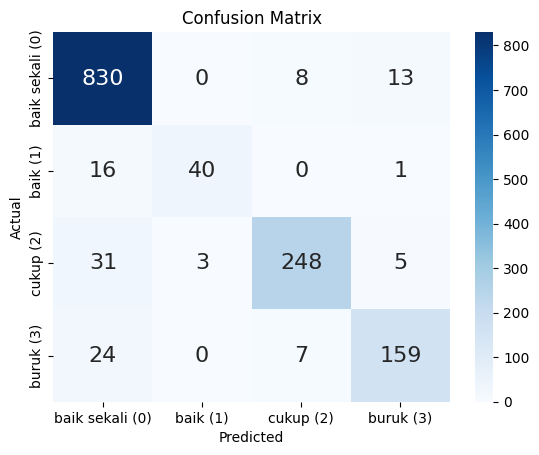

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       851
           1       0.93      0.70      0.80        57
           2       0.94      0.86      0.90       287
           3       0.89      0.84      0.86       190

    accuracy                           0.92      1385
   macro avg       0.92      0.84      0.88      1385
weighted avg       0.92      0.92      0.92      1385



In [164]:
# Cetak confusion matrix dalam bentuk gambar
cm = confusion_matrix(y_test, final_predictions)  # Menggunakan final_predictions bukan y_pred
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
            annot_kws={"size": 16, "ha": 'center', "va": 'center'})
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Atur label sumbu x dan y
plt.xticks([0.5, 1.5, 2.5, 3.5], ['baik sekali (0)', 'baik (1)', 'cukup (2)', 'buruk (3)'])
plt.yticks([0.5, 1.5, 2.5, 3.5], ['baik sekali (0)', 'baik (1)', 'cukup (2)', 'buruk (3)'])

plt.title('Confusion Matrix')
plt.show()

# Display the classification report
print("Classification Report:\n", classification_report(y_test, final_predictions))

In [167]:
# Use the best weights for prediction
y_pred = soft_voting(classifiers, X_test, best_weights_firefly)

# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Soft Voting Accuracy:', accuracy)
print('Soft Voting Precision:', precision)
print('Soft Voting Recall:', recall)
print('SOft Voting F1-score:', f1)

Soft Voting Accuracy: 0.9220216606498195
Soft Voting Precision: 0.9222480882580852
Soft Voting Recall: 0.8445077846805257
SOft Voting F1-score: 0.9205194124033516


# HASIL DATA DARI CONFUSION MATRIX SOFT VOTING

In [77]:
# Use the best weights for prediction
final_predictions = soft_voting(classifiers, X_test, best_weights_firefly)

column_names = ['Jumlah Projek', 'Local Amount', 'nilai projek per LoP', 'Duration (Days)','Masalaku','kontrak harga satuan kurang memenuhi','kontrak harga satuan memenuhi','kontrak harga satuan tidak memenuhi','alker lengkap','alker tidak lengkap','stok material tersedia','stok material tidak tersedia','team tidak lengkap','rapih','tidak rapih','Label']

# Konversi X_test ke DataFrame dan tetapkan nama kolom
X_test_df = pd.DataFrame(X_test, columns=column_names)

# Pastikan y_test dan final_predictions adalah pandas Series
y_test_series = pd.Series(y_test, name='data test')
final_predictions_series = pd.Series(final_predictions, name='data prediksi')

df_new = pd.DataFrame({'data test': y_test_series, 'data prediksi': final_predictions_series})

# Gabungkan DataFrames
df_combined = pd.concat([X_test_df.reset_index(drop=True), df_new.reset_index(drop=True)], axis=1)

df_combined = df_combined.drop(columns=['Label'])

# Menampilkan beberapa baris pertama dari DataFrame yang dikombinasikan
df_combined


,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team tidak lengkap,rapih,tidak rapih,data test,data prediksi
0,77,7753693,597034361,59,59,1,0,0,1,0,1,0,1,0,1,0,0
1,5,27028644,135143220,29,28,1,0,0,1,0,1,0,1,0,1,0,0
2,1,10283932,10283932,60,37,1,0,0,1,0,1,0,1,0,1,0,0
3,5,10815508,54077540,29,4,1,0,0,1,0,1,0,1,0,1,1,1
4,64,4131092,264389888,119,14,1,0,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,88,675720,59463360,44,14,1,0,0,1,0,1,0,1,0,1,0,0
1381,110,24868380,2735521800,44,41,1,0,0,1,0,1,0,1,0,1,2,2
1382,45,17686900,795910500,44,33,1,0,0,1,0,1,0,1,0,1,0,0
1383,64,14447090,924613760,119,14,1,0,0,1,0,1,0,1,0,1,0,0


In [78]:
df_combined.to_excel("output perbandingan soft voting.xlsx")

In [79]:
# Memilih baris di mana 'data test' adalah 0 dan 'data prediksi' adalah 2
filtered_data_soft_voting = df_combined[(df_combined['data test'] == 0) & (df_combined['data prediksi'] == 2)]

filtered_data_soft_voting

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team tidak lengkap,rapih,tidak rapih,data test,data prediksi
22,13,1453505370,18895569810,75,53,1,0,0,1,0,1,0,1,0,1,0,2
237,20,444605485,8892109700,59,57,1,0,0,1,0,1,0,1,0,1,0,2
490,1,98518817,98518817,89,55,1,0,0,1,0,1,0,1,0,1,0,2
606,32,217019129,6944612128,140,49,1,0,0,1,0,1,0,1,0,1,0,2
886,13,205463851,2671030063,89,47,1,0,0,1,0,1,0,1,0,1,0,2
905,32,214569918,6866237376,140,49,1,0,0,1,0,1,0,1,0,1,0,2
924,12,215492844,2585914128,82,24,1,0,0,1,0,1,0,1,0,1,0,2
1235,14,365889725,5122456150,112,40,1,0,0,1,0,1,0,1,0,1,0,2


In [80]:
# Memilih baris di mana 'data test' adalah 0 dan 'data prediksi' adalah 3
filtered_data_soft_voting = df_combined[(df_combined['data test'] == 0) & (df_combined['data prediksi'] == 3)]

filtered_data_soft_voting

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team tidak lengkap,rapih,tidak rapih,data test,data prediksi
51,1,16750741,16750741,29,30,1,0,0,1,0,1,0,1,0,1,0,3
95,11,303734458,3341079038,59,57,1,0,0,1,0,1,0,1,0,1,0,3
166,5,104442724,522213620,59,75,1,0,0,1,0,1,0,1,0,1,0,3
258,23,34416736,791584928,59,71,1,0,0,1,0,1,0,1,0,1,0,3
315,3,175408300,526224900,89,98,1,0,0,1,0,1,0,1,0,1,0,3
421,5,156251132,781255660,94,208,1,0,0,1,0,1,0,1,0,1,0,3
618,1,147615802,147615802,30,31,1,0,0,1,0,1,0,1,0,1,0,3
740,7,26926643,188486501,59,72,1,0,0,1,0,1,0,1,0,1,0,3
826,2,146065391,292130782,59,68,1,0,0,1,0,1,0,1,0,1,0,3
827,8,46679345,373434760,44,48,1,0,0,1,0,1,0,1,0,1,0,3


In [81]:
# Memilih baris di mana 'data test' adalah 1 dan 'data prediksi' adalah 0
filtered_data_soft_voting = df_combined[(df_combined['data test'] == 1) & (df_combined['data prediksi'] == 0)]

filtered_data_soft_voting[:10]

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team tidak lengkap,rapih,tidak rapih,data test,data prediksi
194,1,103124966,103124966,89,56,1,0,0,1,0,1,0,1,0,1,1,0
235,48,24554300,1178606400,44,14,1,0,0,1,0,1,0,1,0,1,1,0
458,13,33991575,441890475,89,47,1,0,0,1,0,1,0,1,0,1,1,0
480,1,68836092,68836092,89,55,1,0,0,1,0,1,0,1,0,1,1,0
609,1,262605362,262605362,89,56,1,0,0,1,0,1,0,1,0,1,1,0
621,1,51011889,51011889,44,34,1,0,0,1,0,1,0,1,0,1,1,0
661,1,23621703,23621703,44,26,1,0,0,1,0,1,0,0,1,1,1,0
665,3,6247889,18743667,59,5,1,0,0,1,0,1,0,1,0,1,1,0
958,1,22923338,22923338,89,55,1,0,0,1,0,1,0,1,0,1,1,0
1049,1,187851612,187851612,89,73,1,0,0,1,0,1,0,1,0,1,1,0


In [82]:
# Memilih baris di mana 'data test' adalah 1 dan 'data prediksi' adalah 3
filtered_data_soft_voting = df_combined[(df_combined['data test'] == 1) & (df_combined['data prediksi'] == 3)]

filtered_data_soft_voting

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team tidak lengkap,rapih,tidak rapih,data test,data prediksi
352,5,1434589973,7172949865,94,295,0,1,0,0,1,1,0,1,0,1,1,3
844,4,306764395,1227057580,59,57,1,0,0,1,0,1,0,1,0,1,1,3


In [83]:
# Memilih baris di mana 'data test' adalah 2 dan 'data prediksi' adalah 0
filtered_data_soft_voting = df_combined[(df_combined['data test'] == 2) & (df_combined['data prediksi'] == 0)]

filtered_data_soft_voting[:10]

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team tidak lengkap,rapih,tidak rapih,data test,data prediksi
21,40,77386257,3095450280,89,83,1,0,0,1,0,1,0,1,0,1,2,0
167,2,118445116,236890232,61,61,1,0,0,1,0,1,0,1,0,1,2,0
265,77,37145154,2860176858,59,59,1,0,0,1,0,1,0,1,0,1,2,0
386,1,24679212,24679212,89,43,1,0,0,1,0,1,0,1,0,1,2,0
436,29,31030642,899888618,89,82,1,0,0,1,0,1,0,1,0,1,2,0
571,1,700659208,700659208,137,403,1,0,0,1,0,1,0,1,0,1,2,0
584,5,265594586,1327972930,112,34,1,0,0,1,0,1,0,1,0,1,2,0
614,77,7165777,551764829,59,59,1,0,0,1,0,1,0,1,0,1,2,0
646,1,104737354,104737354,29,28,1,0,0,1,0,1,0,1,0,1,2,0
657,32,62610527,2003536864,140,49,1,0,0,1,0,1,0,1,0,1,2,0


In [84]:
# Memilih baris di mana 'data test' adalah 2 dan 'data prediksi' adalah 1
filtered_data_soft_voting = df_combined[(df_combined['data test'] == 2) & (df_combined['data prediksi'] == 1)]

filtered_data_soft_voting

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team tidak lengkap,rapih,tidak rapih,data test,data prediksi
579,1,4657457,4657457,74,4,1,0,0,1,0,1,0,1,0,1,2,1
1135,5,123789915,618949575,133,133,1,0,0,1,0,1,0,0,1,1,2,1
1188,4,62629721,250518884,59,18,1,0,0,1,0,1,0,1,0,1,2,1


In [85]:
# Memilih baris di mana 'data test' adalah 2 dan 'data prediksi' adalah 3
filtered_data_soft_voting = df_combined[(df_combined['data test'] == 2) & (df_combined['data prediksi'] == 3)]

filtered_data_soft_voting

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team tidak lengkap,rapih,tidak rapih,data test,data prediksi
39,1,1243810000,1243810000,80,80,1,0,0,1,0,1,0,1,0,1,2,3
244,1,337697540,337697540,59,56,1,0,0,0,1,0,1,1,0,1,2,3
550,3,101709874,305129622,44,44,1,0,0,1,0,1,0,1,0,1,2,3
784,8,32885895,263087160,44,41,1,0,0,0,1,0,1,1,0,1,2,3
1129,2,1973804,3947608,29,43,1,0,0,1,0,1,0,1,0,1,2,3


In [86]:
# Memilih baris di mana 'data test' adalah 3 dan 'data prediksi' adalah 2
filtered_data_soft_voting = df_combined[(df_combined['data test'] == 3) & (df_combined['data prediksi'] == 2)]

filtered_data_soft_voting[:10]

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team tidak lengkap,rapih,tidak rapih,data test,data prediksi
231,4,63007321,252029284,44,45,1,0,0,1,0,1,0,0,1,0,3,2
305,13,184020861,2392271193,59,29,1,0,0,1,0,1,0,1,0,1,3,2
602,11,15381520,169196720,44,42,1,0,0,1,0,1,0,0,1,0,3,2
970,7,10134533,70941731,133,90,1,0,0,1,0,1,0,1,0,1,3,2
972,9,1250521720,11254695480,124,294,1,0,0,1,0,1,0,1,0,1,3,2
981,1,35017847,35017847,29,20,1,0,0,1,0,1,0,0,1,0,3,2
1097,2,704194225,1408388450,59,59,1,0,0,1,0,1,0,1,0,1,3,2


In [87]:
# Memilih baris di mana 'data test' adalah 3 dan 'data prediksi' adalah 2
filtered_data_soft_voting = df_combined[(df_combined['data test'] == 3) & (df_combined['data prediksi'] == 2)]

filtered_data_soft_voting

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team tidak lengkap,rapih,tidak rapih,data test,data prediksi
231,4,63007321,252029284,44,45,1,0,0,1,0,1,0,0,1,0,3,2
305,13,184020861,2392271193,59,29,1,0,0,1,0,1,0,1,0,1,3,2
602,11,15381520,169196720,44,42,1,0,0,1,0,1,0,0,1,0,3,2
970,7,10134533,70941731,133,90,1,0,0,1,0,1,0,1,0,1,3,2
972,9,1250521720,11254695480,124,294,1,0,0,1,0,1,0,1,0,1,3,2
981,1,35017847,35017847,29,20,1,0,0,1,0,1,0,0,1,0,3,2
1097,2,704194225,1408388450,59,59,1,0,0,1,0,1,0,1,0,1,3,2


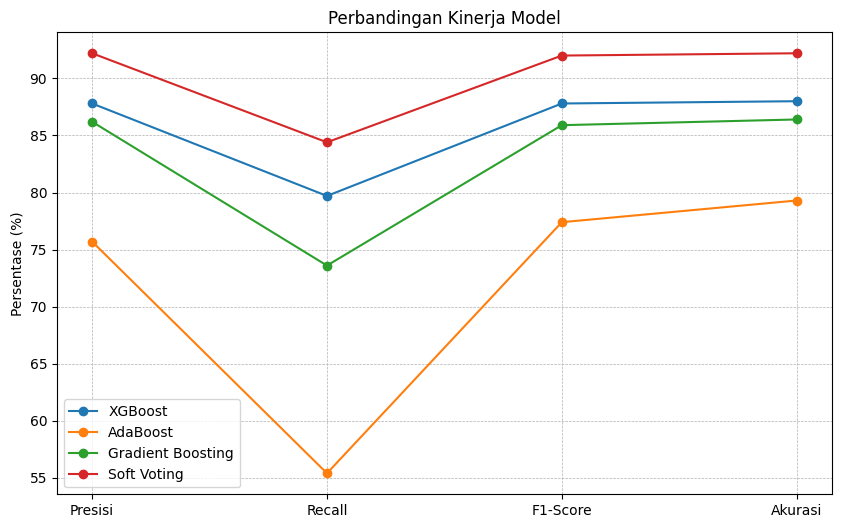

In [190]:
import matplotlib.pyplot as plt

# Data
metrics = ['Presisi', 'Recall', 'F1-Score', 'Akurasi']
xgboost = [87.8, 79.7, 87.8, 88]
adaboost = [75.7, 55.4, 77.4, 79.3]
gradient_boosting = [86.2, 73.6, 85.9, 86.4]
soft_voting = [92.2, 84.4, 92, 92.2]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(metrics, xgboost, marker='o', label='XGBoost')
plt.plot(metrics, adaboost, marker='o', label='AdaBoost')
plt.plot(metrics, gradient_boosting, marker='o', label='Gradient Boosting')
plt.plot(metrics, soft_voting, marker='o', label='Soft Voting')
plt.ylabel('Persentase (%)')
plt.title('Perbandingan Kinerja Model')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

Bobot Terbaik dari Algoritma Firefly: [0.49641323 0.46405907 0.0395277 ]
Akurasi Soft Voting dengan Bobot Terbaik dari Algoritma Firefly: 0.9220216606498195


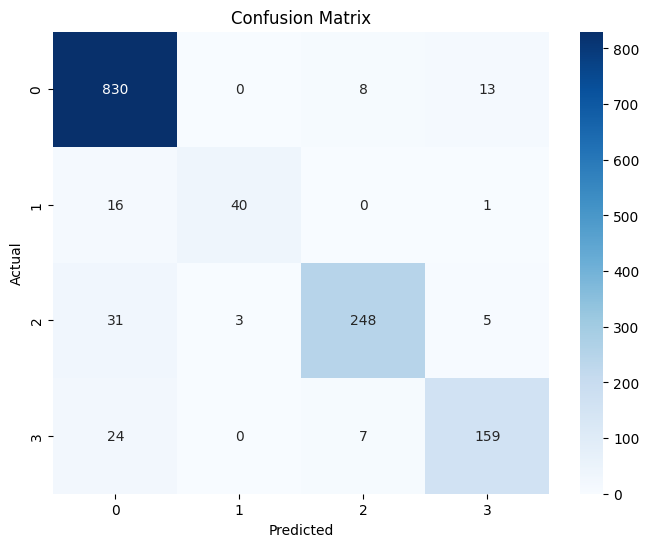

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       851
           1       0.93      0.70      0.80        57
           2       0.94      0.86      0.90       287
           3       0.89      0.84      0.86       190

    accuracy                           0.92      1385
   macro avg       0.92      0.84      0.88      1385
weighted avg       0.92      0.92      0.92      1385



In [88]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Define three classification models
xgb_clf = XGBClassifier()
adaboost_clf = AdaBoostClassifier()
gb_clf = GradientBoostingClassifier()

# Train the models on the training data
xgb_clf.fit(X_train, y_train)
adaboost_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)

# Mendefinisikan model untuk soft voting
classifiers = [xgb_clf, adaboost_clf, gb_clf]

# Fungsi soft voting dengan bobot yang ditentukan
def soft_voting(classifiers, X, weights):
    # Menginisialisasi array untuk menyimpan probabilitas kelas yang diboboti
    num_classes = len(np.unique(y))
    weighted_probabilities = np.zeros((len(X), num_classes))

    for i, clf in enumerate(classifiers):
        # Menghitung probabilitas kelas untuk setiap model
        probabilities = clf.predict_proba(X)
        # Memboboti probabilitas kelas dengan bobot yang sesuai
        weighted_probabilities += probabilities * weights[i]

    # Menghitung kelas dengan probabilitas tertinggi yang diboboti sebagai prediksi akhir
    final_predictions = np.argmax(weighted_probabilities, axis=1)

    return final_predictions

# Fungsi tujuan untuk algoritma Firefly
def objective_function_firefly(weights):
    predictions = soft_voting(classifiers, X_test, weights)
    return -accuracy_score(y_test, predictions)  # Membalikkan akurasi untuk minimasi

# Parameter algoritma Firefly yang disesuaikan
num_fireflies = 40            # Mengurangi jumlah firefly
max_generation_firefly = 230  # Meningkatkan jumlah generasi
alpha = 0.35                  # Meningkatkan eksplorasi
beta = 0.6                    # Mengurangi atraksi

# Batas bawah dan atas untuk bobot Firefly
lower_bound_firefly = 0.0  # Sesuaikan batas bawah sesuai kebutuhan
upper_bound_firefly = 1.0  # Sesuaikan batas atas untuk memastikan bobot berjumlah 1

best_accuracy_firefly = 0.0
best_weights_firefly = None

# Lakukan optimisasi dengan algoritma Firefly
for _ in range(10):
    initial_weights = np.random.uniform(lower_bound_firefly, upper_bound_firefly, len(classifiers))
    result_firefly = minimize(objective_function_firefly, initial_weights, method='Nelder-Mead', options={'maxiter': max_generation_firefly})
    if -result_firefly.fun > best_accuracy_firefly:
        best_accuracy_firefly = -result_firefly.fun
        best_weights_firefly = result_firefly.x

# Normalisasi bobot sehingga jumlahnya menjadi 1
best_weights_firefly /= np.sum(best_weights_firefly)

# Menggunakan bobot terbaik untuk prediksi
final_predictions = soft_voting(classifiers, X_test, best_weights_firefly)

# Output hasil
print("Bobot Terbaik dari Algoritma Firefly:", best_weights_firefly)
print("Akurasi Soft Voting dengan Bobot Terbaik dari Algoritma Firefly:", best_accuracy_firefly)

# Menghitung confusion matrix
conf_mat = confusion_matrix(y_test, final_predictions)

# Menampilkan confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues',
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Menampilkan classification report
print("Classification Report:\n", classification_report(y_test, final_predictions))

Bobot Terbaik dari Algoritma Firefly: [0.53456173 0.05824924 0.40718903]
Akurasi Soft Voting dengan Bobot Terbaik dari Algoritma Firefly: 0.9191335740072202


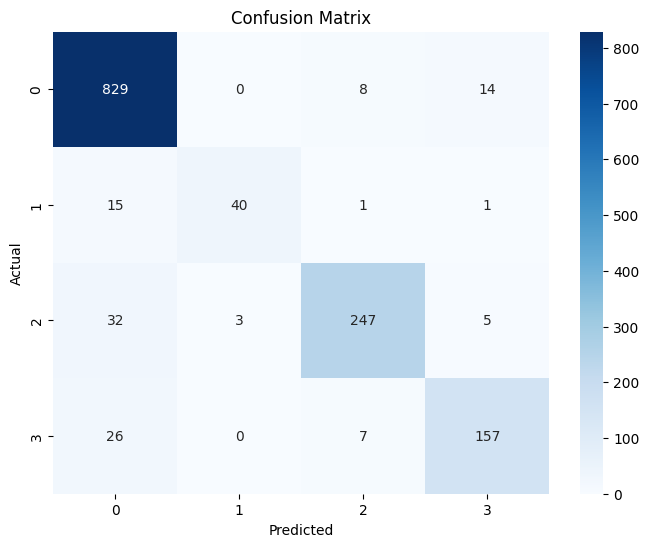

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       851
           1       0.93      0.70      0.80        57
           2       0.94      0.86      0.90       287
           3       0.89      0.83      0.86       190

    accuracy                           0.92      1385
   macro avg       0.92      0.84      0.87      1385
weighted avg       0.92      0.92      0.92      1385



In [89]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Define three classification models
xgb_clf = XGBClassifier()
adaboost_clf = AdaBoostClassifier()
gb_clf = GradientBoostingClassifier()

# Train the models on the training data
xgb_clf.fit(X_train, y_train)
adaboost_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)

# Mendefinisikan model untuk soft voting
classifiers = [xgb_clf, adaboost_clf, gb_clf]

# Fungsi soft voting dengan bobot yang ditentukan
def soft_voting(classifiers, X, weights):
    # Menginisialisasi array untuk menyimpan probabilitas kelas yang diboboti
    num_classes = len(np.unique(y))
    weighted_probabilities = np.zeros((len(X), num_classes))

    for i, clf in enumerate(classifiers):
        # Menghitung probabilitas kelas untuk setiap model
        probabilities = clf.predict_proba(X)
        # Memboboti probabilitas kelas dengan bobot yang sesuai
        weighted_probabilities += probabilities * weights[i]

    # Menghitung kelas dengan probabilitas tertinggi yang diboboti sebagai prediksi akhir
    final_predictions = np.argmax(weighted_probabilities, axis=1)

    return final_predictions

# Fungsi tujuan untuk algoritma Firefly
def objective_function_firefly(weights):
    predictions = soft_voting(classifiers, X_test, weights)
    return -accuracy_score(y_test, predictions)  # Membalikkan akurasi untuk minimasi

# Parameter algoritma Firefly yang disesuaikan
num_fireflies = 60            # Meningkatkan jumlah firefly untuk pencarian yang lebih luas
max_generation_firefly = 180  # Mengurangi sedikit jumlah generasi
alpha = 0.25                  # Meningkatkan eksplorasi
beta = 0.8                    # Mengurangi atraksi

# Batas bawah dan atas untuk bobot Firefly
lower_bound_firefly = 0.0  # Sesuaikan batas bawah sesuai kebutuhan
upper_bound_firefly = 1.0  # Sesuaikan batas atas untuk memastikan bobot berjumlah 1

best_accuracy_firefly = 0.0
best_weights_firefly = None

# Lakukan optimisasi dengan algoritma Firefly
for _ in range(10):
    initial_weights = np.random.uniform(lower_bound_firefly, upper_bound_firefly, len(classifiers))
    result_firefly = minimize(objective_function_firefly, initial_weights, method='Nelder-Mead', options={'maxiter': max_generation_firefly})
    if -result_firefly.fun > best_accuracy_firefly:
        best_accuracy_firefly = -result_firefly.fun
        best_weights_firefly = result_firefly.x

# Normalisasi bobot sehingga jumlahnya menjadi 1
best_weights_firefly /= np.sum(best_weights_firefly)

# Menggunakan bobot terbaik untuk prediksi
final_predictions = soft_voting(classifiers, X_test, best_weights_firefly)

# Output hasil
print("Bobot Terbaik dari Algoritma Firefly:", best_weights_firefly)
print("Akurasi Soft Voting dengan Bobot Terbaik dari Algoritma Firefly:", best_accuracy_firefly)

# Menghitung confusion matrix
conf_mat = confusion_matrix(y_test, final_predictions)

# Menampilkan confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues',
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Menampilkan classification report
print("Classification Report:\n", classification_report(y_test, final_predictions))

Bobot Terbaik dari Algoritma Firefly: [0.45313211 0.49627628 0.05059161]
Akurasi Soft Voting dengan Bobot Terbaik dari Algoritma Firefly: 0.9205776173285198


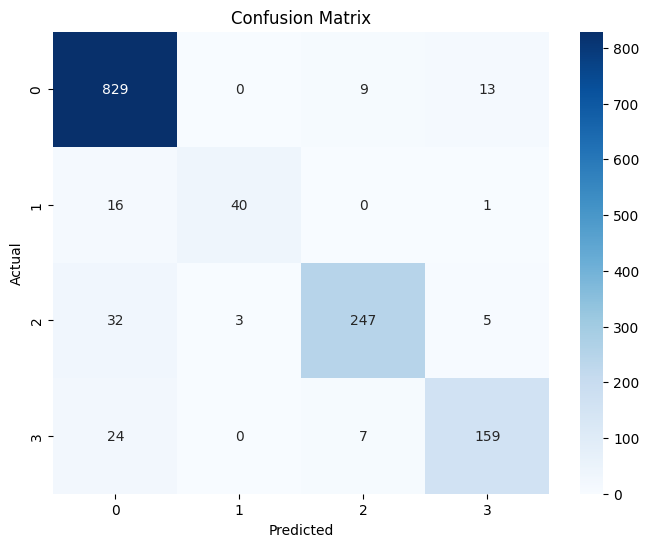

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       851
           1       0.93      0.70      0.80        57
           2       0.94      0.86      0.90       287
           3       0.89      0.84      0.86       190

    accuracy                           0.92      1385
   macro avg       0.92      0.84      0.88      1385
weighted avg       0.92      0.92      0.92      1385



In [90]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Define three classification models
xgb_clf = XGBClassifier()
adaboost_clf = AdaBoostClassifier()
gb_clf = GradientBoostingClassifier()

# Train the models on the training data
xgb_clf.fit(X_train, y_train)
adaboost_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)

# Mendefinisikan model untuk soft voting
classifiers = [xgb_clf, adaboost_clf, gb_clf]

# Fungsi soft voting dengan bobot yang ditentukan
def soft_voting(classifiers, X, weights):
    # Menginisialisasi array untuk menyimpan probabilitas kelas yang diboboti
    num_classes = len(np.unique(y))
    weighted_probabilities = np.zeros((len(X), num_classes))

    for i, clf in enumerate(classifiers):
        # Menghitung probabilitas kelas untuk setiap model
        probabilities = clf.predict_proba(X)
        # Memboboti probabilitas kelas dengan bobot yang sesuai
        weighted_probabilities += probabilities * weights[i]

    # Menghitung kelas dengan probabilitas tertinggi yang diboboti sebagai prediksi akhir
    final_predictions = np.argmax(weighted_probabilities, axis=1)

    return final_predictions

# Fungsi tujuan untuk algoritma Firefly
def objective_function_firefly(weights):
    predictions = soft_voting(classifiers, X_test, weights)
    return -accuracy_score(y_test, predictions)  # Membalikkan akurasi untuk minimasi

# Parameter algoritma Firefly
num_fireflies = 30  # Kurangi jumlah "firefly" untuk optimisasi yang lebih cepat
max_generation_firefly = 100  # Kurangi jumlah generasi untuk optimisasi yang lebih cepat
alpha = 0.1  # Sesuaikan alpha sesuai dengan eksplorasi vs. eksploitasi yang diinginkan
beta = 1.0  # Anda dapat bereksperimen dengan beta, tetapi 1.0 adalah nilai yang masuk akal

# Batas bawah dan atas untuk bobot Firefly
lower_bound_firefly = 0.0  # Sesuaikan batas bawah sesuai kebutuhan
upper_bound_firefly = 1.0  # Sesuaikan batas atas untuk memastikan bobot berjumlah 1

best_accuracy_firefly = 0.0
best_weights_firefly = None

# Lakukan optimisasi dengan algoritma Firefly
for _ in range(10):
    initial_weights = np.random.uniform(lower_bound_firefly, upper_bound_firefly, len(classifiers))
    result_firefly = minimize(objective_function_firefly, initial_weights, method='Nelder-Mead', options={'maxiter': max_generation_firefly})
    if -result_firefly.fun > best_accuracy_firefly:
        best_accuracy_firefly = -result_firefly.fun
        best_weights_firefly = result_firefly.x

# Normalisasi bobot sehingga jumlahnya menjadi 1
best_weights_firefly /= np.sum(best_weights_firefly)

# Menggunakan bobot terbaik untuk prediksi
final_predictions = soft_voting(classifiers, X_test, best_weights_firefly)

# Output hasil
print("Bobot Terbaik dari Algoritma Firefly:", best_weights_firefly)
print("Akurasi Soft Voting dengan Bobot Terbaik dari Algoritma Firefly:", best_accuracy_firefly)

# Menghitung confusion matrix
conf_mat = confusion_matrix(y_test, final_predictions)

# Menampilkan confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues',
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Menampilkan classification report
print("Classification Report:\n", classification_report(y_test, final_predictions))

Bobot Terbaik dari Algoritma Firefly: [0.89648441 0.00593451 0.09758108]
Akurasi Soft Voting dengan Bobot Terbaik dari Algoritma Firefly: 0.9220216606498195


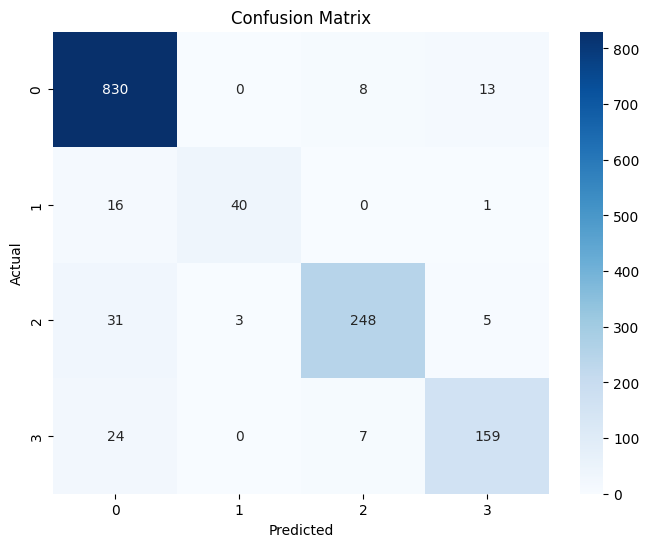

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       851
           1       0.93      0.70      0.80        57
           2       0.94      0.86      0.90       287
           3       0.89      0.84      0.86       190

    accuracy                           0.92      1385
   macro avg       0.92      0.84      0.88      1385
weighted avg       0.92      0.92      0.92      1385



In [91]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from scipy.optimize import minimize
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Define three classification models
xgb_clf = XGBClassifier()
adaboost_clf = AdaBoostClassifier()
gb_clf = GradientBoostingClassifier()

# Train the models on the training data
xgb_clf.fit(X_train, y_train)
adaboost_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)

# Mendefinisikan model untuk soft voting
classifiers = [xgb_clf, adaboost_clf, gb_clf]

# Fungsi soft voting dengan bobot yang ditentukan
def soft_voting(classifiers, X, y, weights):
    num_classes = len(np.unique(y))
    weighted_probabilities = np.zeros((len(X), num_classes))

    for i, clf in enumerate(classifiers):
        probabilities = clf.predict_proba(X)
        weighted_probabilities += probabilities * weights[i]

    final_predictions = np.argmax(weighted_probabilities, axis=1)
    return final_predictions

# Fungsi tujuan untuk algoritma Firefly
def objective_function_firefly(weights):
    predictions = soft_voting(classifiers, X_test, y_test, weights)
    return -accuracy_score(y_test, predictions)

# Parameter algoritma Firefly
num_fireflies = 30
max_generation_firefly = 100
alpha = 0.1
beta = 1.0

# Batas bawah dan atas untuk bobot Firefly
lower_bound_firefly = 0.0
upper_bound_firefly = 1.0

best_accuracy_firefly = 0.0
best_weights_firefly = None

# Lakukan optimisasi dengan algoritma Firefly
for _ in range(10):
    initial_weights = np.random.dirichlet(np.ones(len(classifiers)),size=1)[0]
    result_firefly = minimize(objective_function_firefly, initial_weights, method='Nelder-Mead', options={'maxiter': max_generation_firefly})
    if -result_firefly.fun > best_accuracy_firefly:
        best_accuracy_firefly = -result_firefly.fun
        best_weights_firefly = result_firefly.x

# Normalisasi bobot sehingga jumlahnya menjadi 1
best_weights_firefly /= np.sum(best_weights_firefly)

# Menggunakan bobot terbaik untuk prediksi
final_predictions = soft_voting(classifiers, X_test, y_test, best_weights_firefly)

# Output hasil
print("Bobot Terbaik dari Algoritma Firefly:", best_weights_firefly)
print("Akurasi Soft Voting dengan Bobot Terbaik dari Algoritma Firefly:", best_accuracy_firefly)

# Menghitung confusion matrix
conf_mat = confusion_matrix(y_test, final_predictions)

# Menampilkan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Menampilkan classification report
print("Classification Report:\n", classification_report(y_test, final_predictions))

Bobot Terbaik dari Algoritma Firefly: [0.41068704 0.53909693 0.05021603]
Akurasi Soft Voting dengan Bobot Terbaik dari Algoritma Firefly: 0.9205776173285198


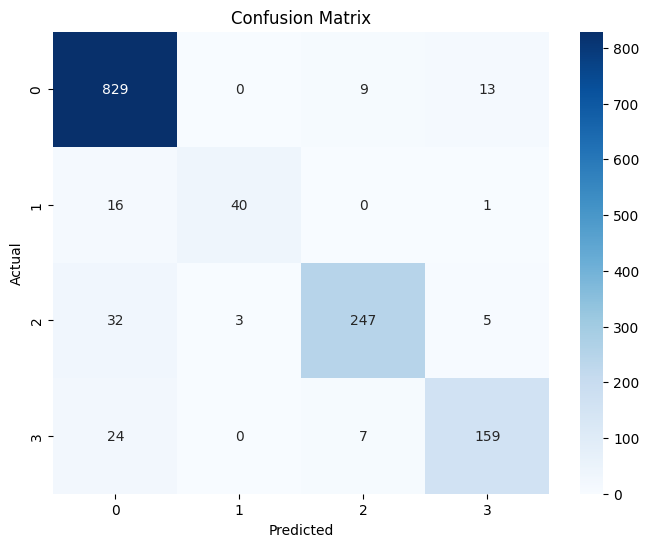

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       851
           1       0.93      0.70      0.80        57
           2       0.94      0.86      0.90       287
           3       0.89      0.84      0.86       190

    accuracy                           0.92      1385
   macro avg       0.92      0.84      0.88      1385
weighted avg       0.92      0.92      0.92      1385



In [92]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Define three classification models
xgb_clf = XGBClassifier()
adaboost_clf = AdaBoostClassifier()
gb_clf = GradientBoostingClassifier()

# Train the models on the training data
xgb_clf.fit(X_train, y_train)
adaboost_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)

# Mendefinisikan model untuk soft voting
classifiers = [xgb_clf, adaboost_clf, gb_clf]

# Fungsi soft voting dengan bobot yang ditentukan
def soft_voting(classifiers, X, weights):
    # Menginisialisasi array untuk menyimpan probabilitas kelas yang diboboti
    num_classes = len(np.unique(y))
    weighted_probabilities = np.zeros((len(X), num_classes))

    for i, clf in enumerate(classifiers):
        # Menghitung probabilitas kelas untuk setiap model
        probabilities = clf.predict_proba(X)
        # Memboboti probabilitas kelas dengan bobot yang sesuai
        weighted_probabilities += probabilities * weights[i]

    # Menghitung kelas dengan probabilitas tertinggi yang diboboti sebagai prediksi akhir
    final_predictions = np.argmax(weighted_probabilities, axis=1)

    return final_predictions

# Fungsi tujuan untuk algoritma Firefly
def objective_function_firefly(weights):
    predictions = soft_voting(classifiers, X_test, weights)
    return -accuracy_score(y_test, predictions)  # Membalikkan akurasi untuk minimasi

# Parameter algoritma Firefly
num_fireflies = 30  # Kurangi jumlah "firefly" untuk optimisasi yang lebih cepat
max_generation_firefly = 100  # Kurangi jumlah generasi untuk optimisasi yang lebih cepat
alpha = 0.1  # Sesuaikan alpha sesuai dengan eksplorasi vs. eksploitasi yang diinginkan
beta = 1.0  # Anda dapat bereksperimen dengan beta, tetapi 1.0 adalah nilai yang masuk akal

# Batas bawah dan atas untuk bobot Firefly
lower_bound_firefly = 0.0  # Sesuaikan batas bawah sesuai kebutuhan
upper_bound_firefly = 1.0  # Sesuaikan batas atas untuk memastikan bobot berjumlah 1

best_accuracy_firefly = 0.0
best_weights_firefly = None

# Lakukan optimisasi dengan algoritma Firefly
for _ in range(10):
    initial_weights = np.random.uniform(lower_bound_firefly, upper_bound_firefly, len(classifiers))
    result_firefly = minimize(objective_function_firefly, initial_weights, method='Nelder-Mead', options={'maxiter': max_generation_firefly})
    if -result_firefly.fun > best_accuracy_firefly:
        best_accuracy_firefly = -result_firefly.fun
        best_weights_firefly = result_firefly.x

# Normalisasi bobot sehingga jumlahnya menjadi 1
best_weights_firefly /= np.sum(best_weights_firefly)

# Menggunakan bobot terbaik untuk prediksi
final_predictions = soft_voting(classifiers, X_test, best_weights_firefly)

# Output hasil
print("Bobot Terbaik dari Algoritma Firefly:", best_weights_firefly)
print("Akurasi Soft Voting dengan Bobot Terbaik dari Algoritma Firefly:", best_accuracy_firefly)

# Menghitung confusion matrix
conf_mat = confusion_matrix(y_test, final_predictions)

# Menampilkan confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues',
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Menampilkan classification report
print("Classification Report:\n", classification_report(y_test, final_predictions))

In [93]:
import pandas as pd
import xgboost as xgb

# Ganti path dengan direktori yang sesuai
path = '/content/drive/My Drive/Colab Notebooks/'

# Membaca data mitra dari file CSV
data_mitra = pd.read_csv(path + 'mitra_telkom.csv', encoding="ISO-8859-1")

# Memisahkan fitur (features) dan label (target) dari data
X = data_mitra.drop('Label', axis=1)  # Fitur-fitur
y = data_mitra['Label']  # Label

# Melakukan training algoritma XGBoost dengan data yang ada
model = xgb.XGBClassifier()
model.fit(X, y)

# Pastikan data baru hanya memiliki fitur-fitur yang sama dengan data pelatihan
fitur_data_baru = data_mitra[X.columns]

# Prediksi data baru
prediksi = model.predict(fitur_data_baru)

# Menggunakan model probabilistik untuk mendapatkan probabilitas kelas
probabilitas_prediksi = model.predict_proba(fitur_data_baru)

# Menambahkan kolom "Label_Prediksi" ke data baru dan mengisinya dengan hasil prediksi
data_mitra['Label XGBoost'] = prediksi

# Tampilkan data baru beserta label hasil prediksi dari XGBoost
data_mitra

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team lengkap,team tidak lengkap,rapih,tidak rapih,Label,Label XGBoost
0,8,3582546,28660368,59,74,1,0,0,1,0,1,0,1,0,1,0,3,3
1,8,16057014,128456112,59,74,1,0,0,1,0,1,0,1,0,1,0,3,3
2,8,1955579,15644632,59,74,1,0,0,1,0,1,0,1,0,1,0,3,3
3,8,24203409,193627272,59,74,1,0,0,1,0,1,0,1,0,1,0,3,3
4,8,7735037,61880296,59,74,1,0,0,1,0,1,0,1,0,1,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6917,16,2165478,34647648,29,2,1,0,0,1,0,1,0,1,0,1,0,1,1
6918,16,2165478,34647648,29,2,1,0,0,1,0,1,0,1,0,1,0,1,1
6919,16,2165478,34647648,29,2,0,1,0,1,0,1,0,1,0,0,1,1,1
6920,16,2103255,33652080,29,2,0,1,0,1,0,1,0,1,0,0,1,1,1


In [94]:
# Melakukan pelatihan algoritma Adaboost dengan data yang ada
model_adaboost = AdaBoostClassifier()
model_adaboost.fit(X, y)

# Melakukan prediksi data baru menggunakan model Adaboost
prediksi_adaboost = model_adaboost.predict(fitur_data_baru)

# Menggunakan model probabilistik untuk mendapatkan probabilitas kelas dengan Adaboost
probabilitas_prediksi_adaboost = model_adaboost.predict_proba(fitur_data_baru)

# Menambahkan kolom "Label Adaboost" ke data baru dan mengisinya dengan hasil prediksi Adaboost
data_mitra['Label Adaboost'] = prediksi_adaboost

data_mitra[:10]

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team lengkap,team tidak lengkap,rapih,tidak rapih,Label,Label XGBoost,Label Adaboost
0,8,3582546,28660368,59,74,1,0,0,1,0,1,0,1,0,1,0,3,3,3
1,8,16057014,128456112,59,74,1,0,0,1,0,1,0,1,0,1,0,3,3,0
2,8,1955579,15644632,59,74,1,0,0,1,0,1,0,1,0,1,0,3,3,3
3,8,24203409,193627272,59,74,1,0,0,1,0,1,0,1,0,1,0,3,3,0
4,8,7735037,61880296,59,74,1,0,0,1,0,1,0,1,0,1,0,3,3,3
5,8,5571596,44572768,59,74,1,0,0,1,0,1,0,1,0,1,0,3,3,3
6,7,4564635,31952445,29,54,1,0,0,1,0,1,0,1,0,1,0,3,3,3
7,7,8884625,62192375,29,54,1,0,0,1,0,1,0,1,0,1,0,3,3,3
8,7,13414733,93903131,29,54,1,0,0,1,0,1,0,1,0,1,0,3,3,3
9,7,33880541,237163787,29,54,1,0,0,1,0,1,0,1,0,1,0,3,3,3


In [95]:
# Melakukan training algoritma Gradient Boosting dengan data yang ada
model_gb = GradientBoostingClassifier()
model_gb.fit(X, y)

# Prediksi data baru menggunakan model Gradient Boosting
prediksi_gb = model_gb.predict(fitur_data_baru)

# Menggunakan model probabilistik untuk mendapatkan probabilitas kelas dengan Gradient Boosting
probabilitas_prediksi_gb = model_gb.predict_proba(fitur_data_baru)

# Menambahkan kolom "Label Gradient Boosting" ke data baru dan mengisinya dengan hasil prediksi Gradient Boosting
data_mitra['Label Gradient Boosting'] = prediksi_gb

# Tampilkan data baru beserta label hasil prediksi dari Gradient Boosting
data_mitra

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team lengkap,team tidak lengkap,rapih,tidak rapih,Label,Label XGBoost,Label Adaboost,Label Gradient Boosting
0,8,3582546,28660368,59,74,1,0,0,1,0,1,0,1,0,1,0,3,3,3,3
1,8,16057014,128456112,59,74,1,0,0,1,0,1,0,1,0,1,0,3,3,0,3
2,8,1955579,15644632,59,74,1,0,0,1,0,1,0,1,0,1,0,3,3,3,3
3,8,24203409,193627272,59,74,1,0,0,1,0,1,0,1,0,1,0,3,3,0,3
4,8,7735037,61880296,59,74,1,0,0,1,0,1,0,1,0,1,0,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6917,16,2165478,34647648,29,2,1,0,0,1,0,1,0,1,0,1,0,1,1,0,1
6918,16,2165478,34647648,29,2,1,0,0,1,0,1,0,1,0,1,0,1,1,0,1
6919,16,2165478,34647648,29,2,0,1,0,1,0,1,0,1,0,0,1,1,1,2,1
6920,16,2103255,33652080,29,2,0,1,0,1,0,1,0,1,0,0,1,1,1,2,1


In [96]:
# Fungsi voting lembut menggunakan bobot yang ditentukan (hasil dari Firefly)
def soft_voting(weights, classifiers, X):
    votes = np.zeros((len(X), len(classifiers), len(np.unique(y))))
    for i, clf in enumerate(classifiers):
        probabilities = clf.predict_proba(X)
        votes[:, i, :] = probabilities * weights[i]  # Kalikan probabilitas dengan bobot
    return np.argmax(np.sum(votes, axis=1), axis=1)  # Ambil kelas dengan probabilitas tertinggi

# Tampilkan data baru beserta hasil prediksi dari Soft Voting
prediksi_soft_voting = soft_voting(best_weights_firefly, classifiers, fitur_data_baru)
data_mitra['Label Soft Voting'] = prediksi_soft_voting

data_mitra

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,...,stok material tidak tersedia,team lengkap,team tidak lengkap,rapih,tidak rapih,Label,Label XGBoost,Label Adaboost,Label Gradient Boosting,Label Soft Voting
0,8,3582546,28660368,59,74,1,0,0,1,0,...,0,1,0,1,0,3,3,3,3,3
1,8,16057014,128456112,59,74,1,0,0,1,0,...,0,1,0,1,0,3,3,0,3,3
2,8,1955579,15644632,59,74,1,0,0,1,0,...,0,1,0,1,0,3,3,3,3,3
3,8,24203409,193627272,59,74,1,0,0,1,0,...,0,1,0,1,0,3,3,0,3,3
4,8,7735037,61880296,59,74,1,0,0,1,0,...,0,1,0,1,0,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6917,16,2165478,34647648,29,2,1,0,0,1,0,...,0,1,0,1,0,1,1,0,1,1
6918,16,2165478,34647648,29,2,1,0,0,1,0,...,0,1,0,1,0,1,1,0,1,1
6919,16,2165478,34647648,29,2,0,1,0,1,0,...,0,1,0,0,1,1,1,2,1,1
6920,16,2103255,33652080,29,2,0,1,0,1,0,...,0,1,0,0,1,1,1,2,1,1


In [97]:
# Menyimpan DataFrame ke file CSV
data_prediksi_csv = "data prediksi(2).csv"  # Nama file CSV yang ingin disimpan
path_direktori = "/content/drive/My Drive/Colab Notebooks"  # Path lengkap ke direktori penyimpanan (ubah sesuai dengan direktori Anda)
data_mitra.to_csv(path_direktori + "/" + data_prediksi_csv, index=False)  # Menyimpan DataFrame ke file CSV

In [98]:
# Membaca dataset
path = '/content/drive/My Drive/Colab Notebooks/'
data_prediksi = pd.read_csv(path + 'data prediksi(2).csv', encoding="ISO-8859-1")
data_prediksi

,Jumlah Projek,Local Amount,nilai projek per LoP,Duration (Days),Masalaku,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,...,stok material tidak tersedia,team lengkap,team tidak lengkap,rapih,tidak rapih,Label,Label XGBoost,Label Adaboost,Label Gradient Boosting,Label Soft Voting
0,8,3582546,28660368,59,74,1,0,0,1,0,...,0,1,0,1,0,3,3,3,3,3
1,8,16057014,128456112,59,74,1,0,0,1,0,...,0,1,0,1,0,3,3,0,3,3
2,8,1955579,15644632,59,74,1,0,0,1,0,...,0,1,0,1,0,3,3,3,3,3
3,8,24203409,193627272,59,74,1,0,0,1,0,...,0,1,0,1,0,3,3,0,3,3
4,8,7735037,61880296,59,74,1,0,0,1,0,...,0,1,0,1,0,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6917,16,2165478,34647648,29,2,1,0,0,1,0,...,0,1,0,1,0,1,1,0,1,1
6918,16,2165478,34647648,29,2,1,0,0,1,0,...,0,1,0,1,0,1,1,0,1,1
6919,16,2165478,34647648,29,2,0,1,0,1,0,...,0,1,0,0,1,1,1,2,1,1
6920,16,2103255,33652080,29,2,0,1,0,1,0,...,0,1,0,0,1,1,1,2,1,1


In [99]:
print(data_prediksi['Label Soft Voting'].value_counts())
#print(df_dataTraining.value_counts())

0    4362
2    1377
3     928
1     255
Name: Label Soft Voting, dtype: int64


In [100]:
# Membaca dataset
path = '/content/drive/My Drive/Colab Notebooks/'
data_klasifikasi = pd.read_csv(path + 'data klasifikasi(3).csv', encoding="ISO-8859-1")
data_klasifikasi

,Short Text,WBS Desc,Name of Vendor,Description Project,Local Amount,Jumlah Projek,Duration (Days),Masalaku,nilai projek per LoP,kontrak harga satuan kurang memenuhi,...,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team lengkap,team tidak lengkap,rapih,tidak rapih,Label Soft Voting
0,R7 MKS ANT PT2 NOV 2021(8 LOP),PT2 TREG VII,PT. TELKOM AKSES,PT-2 8 LOP Periode November Area Witel Makassa...,3582546,8,59,74,28660368,1,...,0,1,0,1,0,1,0,1,0,3
1,R7 MKS BAL PT2 NOV 2021(8 LOP),PT2 TREG VII,PT. TELKOM AKSES,PT-2 8 LOP Periode November Area Witel Makassa...,16057014,8,59,74,128456112,1,...,0,1,0,1,0,1,0,1,0,3
2,R7 MKS MAT PT2 NOV 2021(8 LOP),PT2 TREG VII,PT. TELKOM AKSES,PT-2 8 LOP Periode November Area Witel Makassa...,1955579,8,59,74,15644632,1,...,0,1,0,1,0,1,0,1,0,3
3,R7 MKS PNK PT2 NOV 2021(8 LOP),PT2 TREG VII,PT. TELKOM AKSES,PT-2 8 LOP Periode November Area Witel Makassa...,24203409,8,59,74,193627272,1,...,0,1,0,1,0,1,0,1,0,3
4,R7 MKS TKA PT2 NOV 2021(8 LOP),PT2 TREG VII,PT. TELKOM AKSES,PT-2 8 LOP Periode November Area Witel Makassa...,7735037,8,59,74,61880296,1,...,0,1,0,1,0,1,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6917,R7 PRE PRE PT2 LAUNDRY SELFIANI,LME & INST AP CONS TREG-7,PT. MAPPADECENG JAYA LESTARI (I),Pengadaan Pekerjaan LastMile FO 16 LoP Area Wi...,2165478,16,29,2,34647648,1,...,0,1,0,1,0,1,0,1,0,1
6918,R7 PRE PRE PT2 QANIAH MOTOR,LME & INST AP CONS TREG-7,PT. MAPPADECENG JAYA LESTARI (I),Pengadaan Pekerjaan LastMile FO 16 LoP Area Wi...,2165478,16,29,2,34647648,1,...,0,1,0,1,0,1,0,1,0,1
6919,R7 PRE PRE PT2 HIJRAHTULK MADINAH,LME & INST AP CONS TREG-7,PT. MAPPADECENG JAYA LESTARI (I),Pengadaan Pekerjaan LastMile FO 16 LoP Area Wi...,2165478,16,29,2,34647648,0,...,0,1,0,1,0,1,0,0,1,1
6920,R7 PRE PIN PT2 BSI KCP Pinrang,LME & INST AP CONS TREG-7,PT. MAPPADECENG JAYA LESTARI (I),Pengadaan Pekerjaan LastMile FO 16 LoP Area Wi...,2103255,16,29,2,33652080,0,...,0,1,0,1,0,1,0,0,1,1


In [101]:
print(data_klasifikasi['Label Soft Voting'].value_counts())
#print(df_dataTraining.value_counts())

0    4482
2    1340
3     854
1     246
Name: Label Soft Voting, dtype: int64


(-1.0999983532214541,
 1.0999876100753379,
 -1.0999985869713789,
 1.0999988245743653)

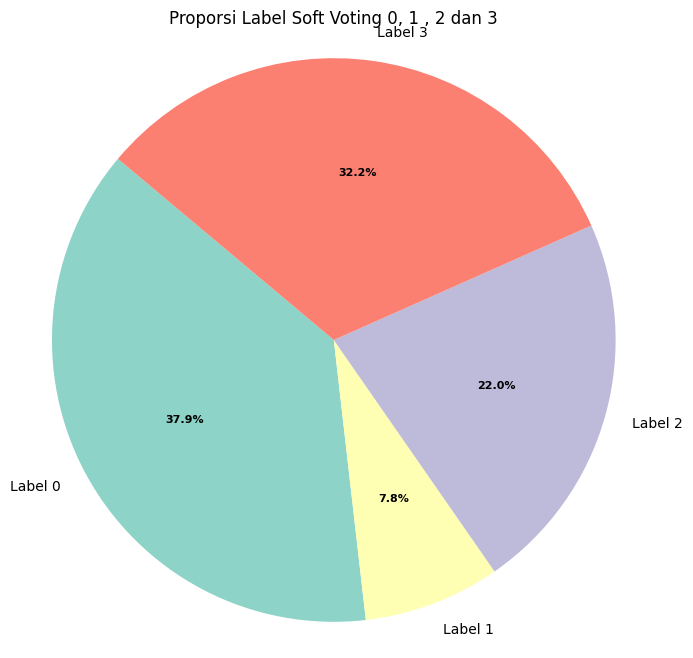

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd  # Anda perlu mengimpor pandas juga

# Membaca dataset
path = '/content/drive/My Drive/Colab Notebooks/'
data_klasifikasi = pd.read_csv(path + 'data klasifikasi(2).csv', encoding="ISO-8859-1")

# Anda sudah melatih klasifikasi individual bernama clf1, clf2, dan clf3
soft_voting = VotingClassifier(estimators=[('xgb', xgb_clf), ('adaboost', adaboost_clf), ('gb', gb_clf)], voting='soft')

encoder_vendor = LabelEncoder()
encoder_wbs = LabelEncoder()

data_klasifikasi['Name of Vendor'] = encoder_vendor.fit_transform(data_klasifikasi['Name of Vendor'])
data_klasifikasi['Description Project'] = encoder_wbs.fit_transform(data_klasifikasi['WBS Desc'])

# Menghapus baris dengan nilai NaN di 'Label Soft Voting'
data_klasifikasi.dropna(subset=['Label Soft Voting'], inplace=True)

# Inisialisasi X_train dan y_train sesuai dengan data yang Anda punya
X_train = data_klasifikasi[['Name of Vendor', 'Description Project']]
y_train = data_klasifikasi['Label Soft Voting']

soft_voting.fit(X_train, y_train)

# Menghitung jumlah data berdasarkan 'Name of Vendor' dan 'Label Soft Voting'
vendor_label_counts = data_klasifikasi.groupby(['Name of Vendor', 'Label Soft Voting']).size().unstack(fill_value=0)

# Menghitung total jumlah data berdasarkan 'Name of Vendor'
vendor_total_counts = vendor_label_counts.sum(axis=1)

# Menghitung proporsi Label Soft Voting 0 dalam setiap vendor
prop_label0 = vendor_label_counts[0] / vendor_total_counts

# Menghitung proporsi Label Soft Voting 1 dalam setiap vendor
prop_label1 = vendor_label_counts[1] / vendor_total_counts

# Menghitung proporsi Label Soft Voting 2 dalam setiap vendor
prop_label2 = vendor_label_counts[2] / vendor_total_counts

# Menghitung proporsi Label Soft Voting 3 dalam setiap vendor
prop_label3 = vendor_label_counts[3] / vendor_total_counts

# Menggunakan encoder yang sama untuk mengubah kembali nilai ke asal pada sumbu x
reversed_vendor_labels = encoder_vendor.inverse_transform(vendor_label_counts.index)

# Membuat diagram lingkaran
fig, ax = plt.subplots(figsize=(8, 8))
colors = plt.cm.Set3.colors
wedges, texts, autotexts = ax.pie([prop_label0.sum(), prop_label1.sum(), prop_label2.sum(), prop_label3.sum()], labels=['Label 0', 'Label 1', 'Label 2', 'Label 3'], autopct='%1.1f%%', startangle=140, colors=colors)
ax.set_title('Proporsi Label Soft Voting 0, 1 , 2 dan 3')
plt.setp(autotexts, size=8, weight="bold")
ax.axis('equal')  # Lingkaran terlihat seperti lingkaran, bukan elips

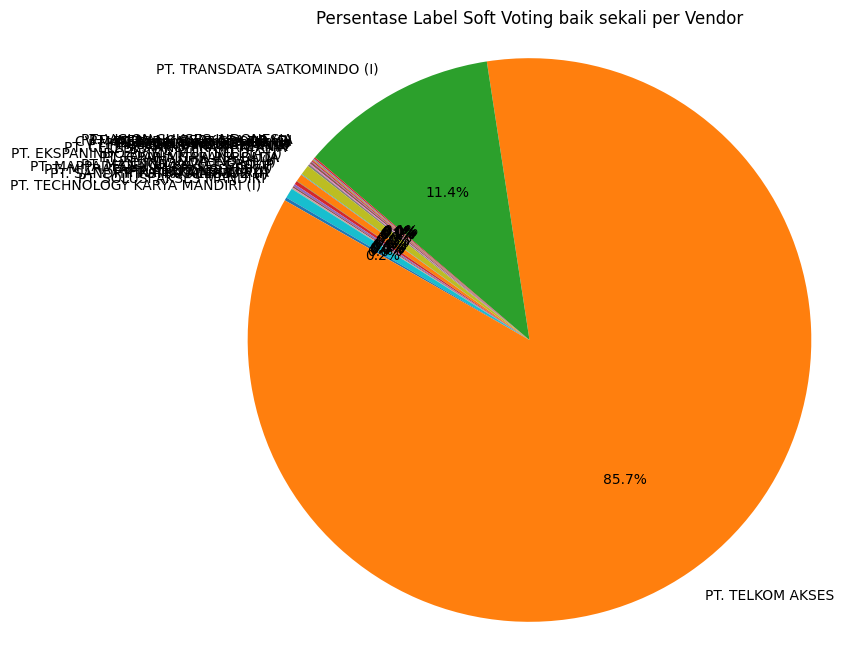

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca dataset
path = '/content/drive/My Drive/Colab Notebooks/'
data_klasifikasi = pd.read_csv(path + 'data klasifikasi(3).csv', encoding="ISO-8859-1")

# Mengelompokkan data berdasarkan "Name of Vendor" dan "Label Soft Voting"
grouped_data = data_klasifikasi.groupby(['Name of Vendor', 'Label Soft Voting'])['Short Text'].count().reset_index()

# Filter data untuk Label Soft Voting 1
label_1_data = grouped_data[grouped_data['Label Soft Voting'] == 0]

# Menghitung jumlah data per vendor
vendor_counts = label_1_data.groupby('Name of Vendor')['Short Text'].sum()

# Membuat diagram lingkaran
plt.figure(figsize=(8, 8))
plt.pie(vendor_counts, labels=vendor_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Agar diagram lingkaran terlihat bulat
plt.title('Persentase Label Soft Voting baik sekali per Vendor')
plt.show()


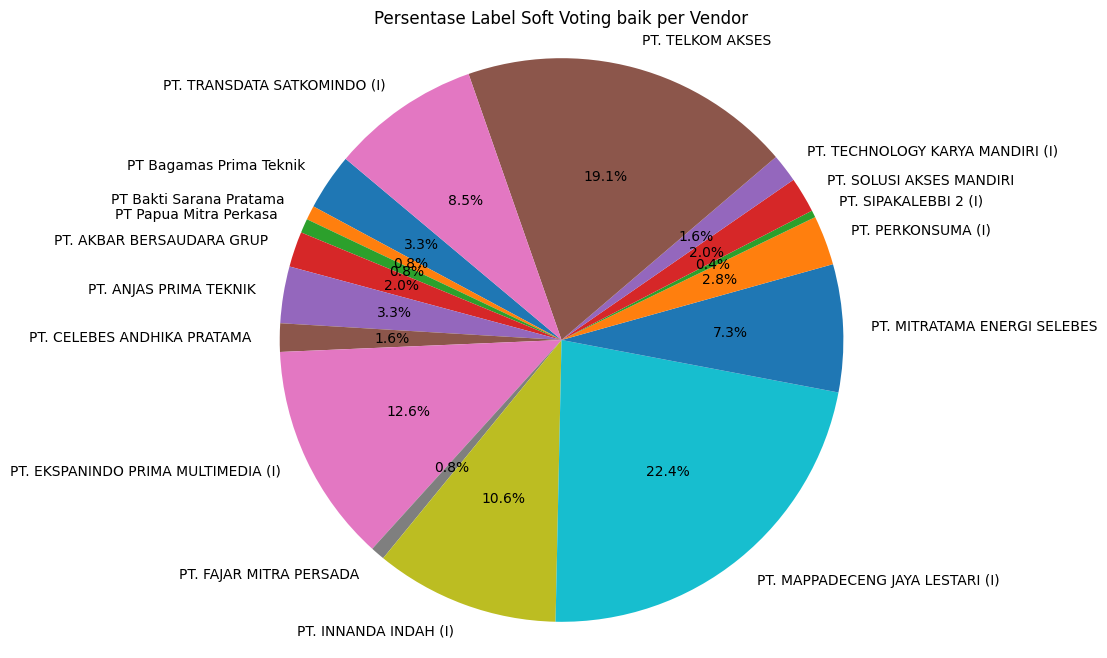

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca dataset
path = '/content/drive/My Drive/Colab Notebooks/'
data_klasifikasi = pd.read_csv(path + 'data klasifikasi(3).csv', encoding="ISO-8859-1")

# Mengelompokkan data berdasarkan "Name of Vendor" dan "Label Soft Voting"
grouped_data = data_klasifikasi.groupby(['Name of Vendor', 'Label Soft Voting'])['Short Text'].count().reset_index()

# Filter data untuk Label Soft Voting 1
label_1_data = grouped_data[grouped_data['Label Soft Voting'] == 1]

# Menghitung jumlah data per vendor
vendor_counts = label_1_data.groupby('Name of Vendor')['Short Text'].sum()

# Membuat diagram lingkaran
plt.figure(figsize=(8, 8))
plt.pie(vendor_counts, labels=vendor_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Agar diagram lingkaran terlihat bulat
plt.title('Persentase Label Soft Voting baik per Vendor')
plt.show()

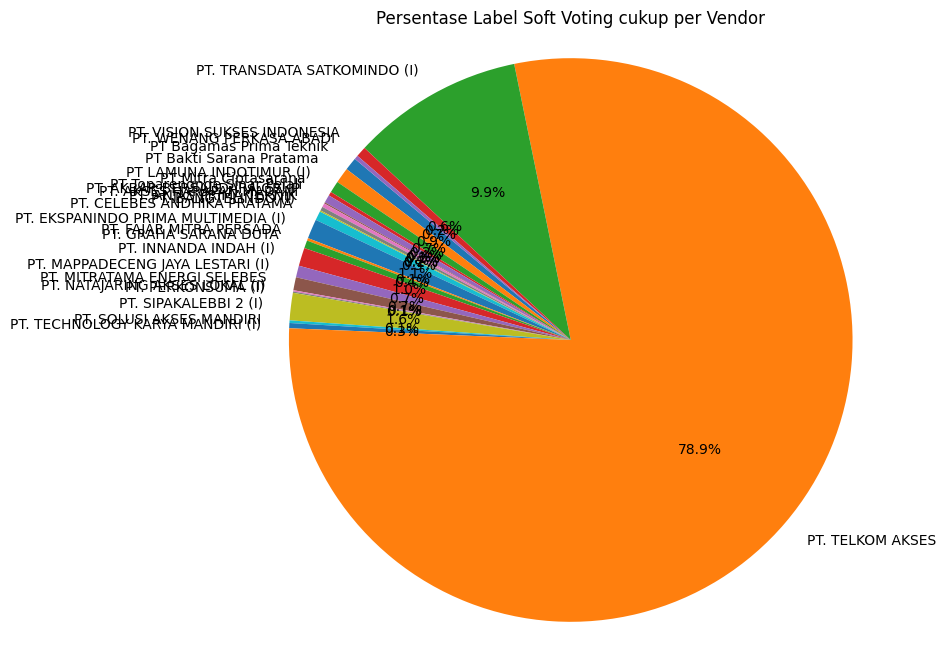

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca dataset
path = '/content/drive/My Drive/Colab Notebooks/'
data_klasifikasi = pd.read_csv(path + 'data klasifikasi(3).csv', encoding="ISO-8859-1")

# Mengelompokkan data berdasarkan "Name of Vendor" dan "Label Soft Voting"
grouped_data = data_klasifikasi.groupby(['Name of Vendor', 'Label Soft Voting'])['Short Text'].count().reset_index()

# Filter data untuk Label Soft Voting 1
label_1_data = grouped_data[grouped_data['Label Soft Voting'] == 2]

# Menghitung jumlah data per vendor
vendor_counts = label_1_data.groupby('Name of Vendor')['Short Text'].sum()

# Membuat diagram lingkaran
plt.figure(figsize=(8, 8))
plt.pie(vendor_counts, labels=vendor_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Agar diagram lingkaran terlihat bulat
plt.title('Persentase Label Soft Voting cukup per Vendor')
plt.show()

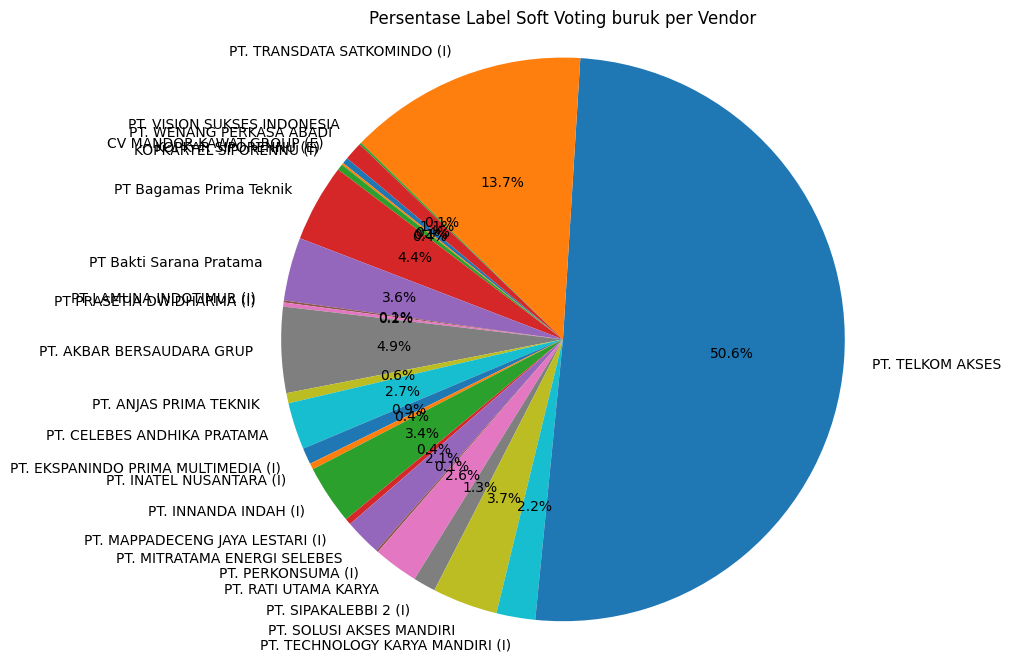

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca dataset
path = '/content/drive/My Drive/Colab Notebooks/'
data_klasifikasi = pd.read_csv(path + 'data klasifikasi(3).csv', encoding="ISO-8859-1")

# Mengelompokkan data berdasarkan "Name of Vendor" dan "Label Soft Voting"
grouped_data = data_klasifikasi.groupby(['Name of Vendor', 'Label Soft Voting'])['Short Text'].count().reset_index()

# Filter data untuk Label Soft Voting 1
label_1_data = grouped_data[grouped_data['Label Soft Voting'] == 3]

# Menghitung jumlah data per vendor
vendor_counts = label_1_data.groupby('Name of Vendor')['Short Text'].sum()

# Membuat diagram lingkaran
plt.figure(figsize=(8, 8))
plt.pie(vendor_counts, labels=vendor_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Agar diagram lingkaran terlihat bulat
plt.title('Persentase Label Soft Voting buruk per Vendor')
plt.show()